<a href="https://colab.research.google.com/github/rmehdi1/CommunityProject_Mobilize/blob/main/MobilizeNow_Analysis_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
!pip install textstat

In [47]:
from sklearn.preprocessing import LabelEncoder

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
CHANGE.ORG PETITION ANALYSIS SETUP
Dataset loaded successfully
Shape: (3081, 42)
Columns: 42
Rows: 3081

DATA VALIDATION & QUALITY ASSESSMENT
Dataset shape: (3081, 42)
Total petitions: 3,081
Total features: 42

Target Variable Validation:
Success rate: 23.2% (715 successful petitions)
Class balance: 76.8% unsuccessful / 23.2% successful

Success Pathway Analysis:
Official victories: 119 (3.9%)
High efficiency (top 20%): 617 (20.0%)
High scale (top 20%): 617 (20.0%)

MISSING DATA ASSESSMENT:
----------------------------------------
Variables with missing data:
              Missing_Count  Missing_Percentage
victory_date           2962           96.137618
end_date               1442           46.802986
lat                     314           10.191496
long                    314           10.191496

FEATURE DISTRIBUTION ANALYSIS
PERFORMANCE METRICS SUMMARY:
-----

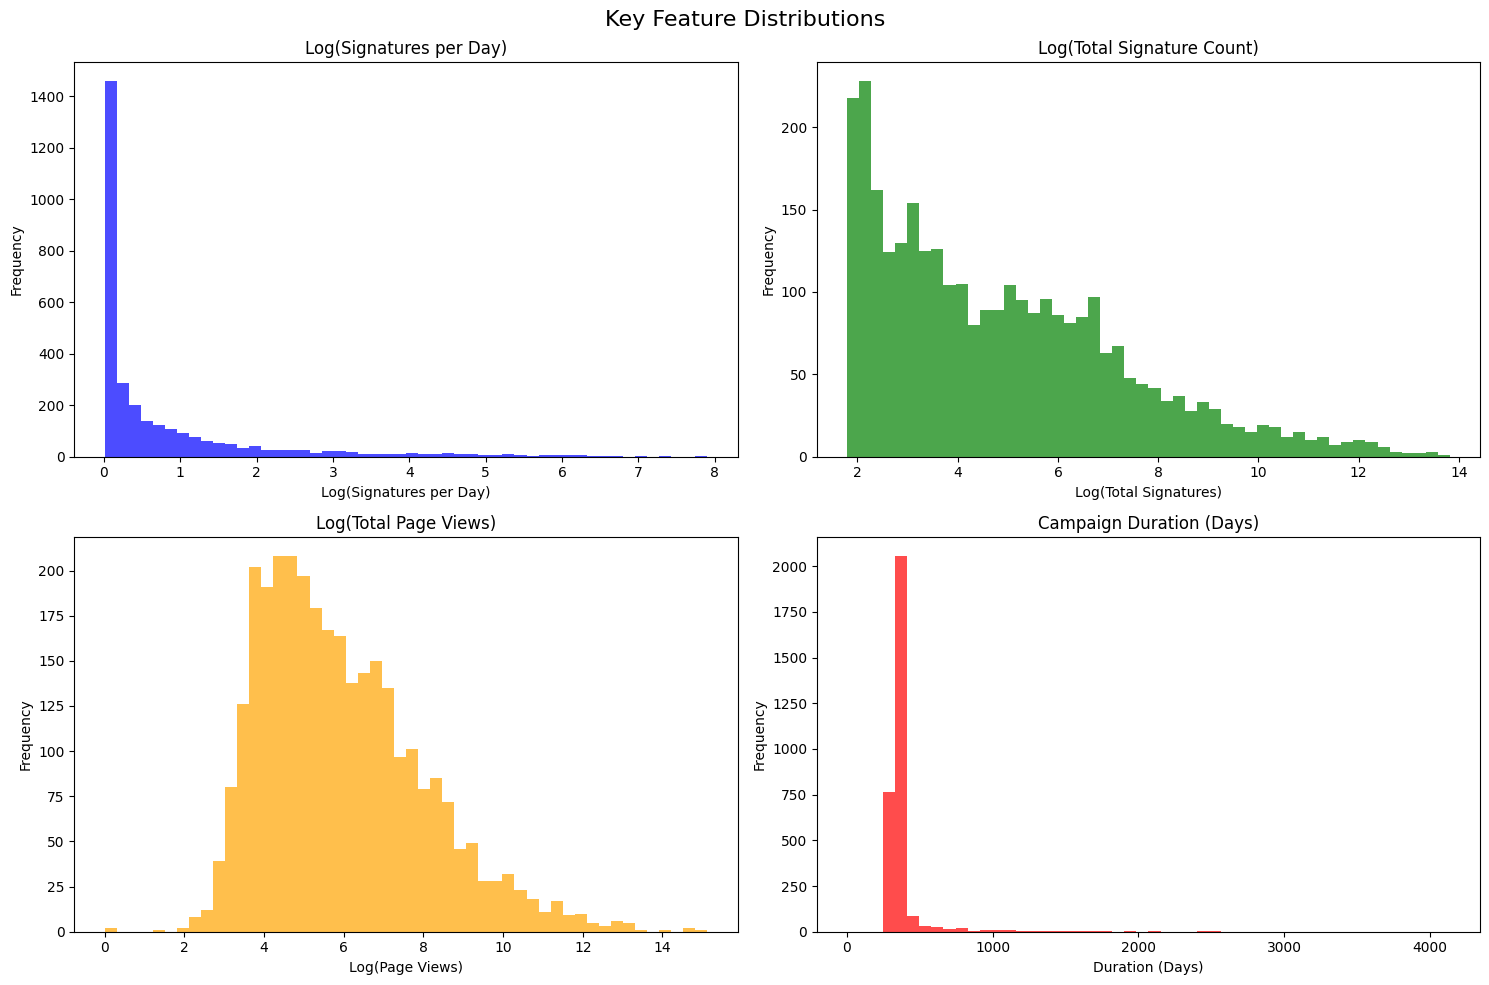


BIVARIATE ANALYSIS: CATEGORICAL VARIABLES
Categorical Variable Analysis:
Variable                 Chi-square  p-value     Significant Success Rate Diff
--------------------------------------------------------------------------------
petition_status          409.600.0000      Yes         80.0%
is_victory               405.130.0000      Yes         79.9%
is_verified_victory      3.010.0826      No          76.8%
is_pledge                0.001.0000      No          0.0%
sponsored_campaign       0.001.0000      No          0.0%
hide_comments            0.001.0000      No          1.8%
hide_dm_action_panel     0.001.0000      No          0.0%
enable_human_verificatio 3.010.0826      No          76.8%
original_locale          40.020.0000      Yes         100.0%
has_location             14.110.0002      Yes         9.6%
is_active                27.350.0000      Yes         8.0%
has_end_date             27.350.0000      Yes         8.0%
has_daily_activity       131.400.0000      Yes         2

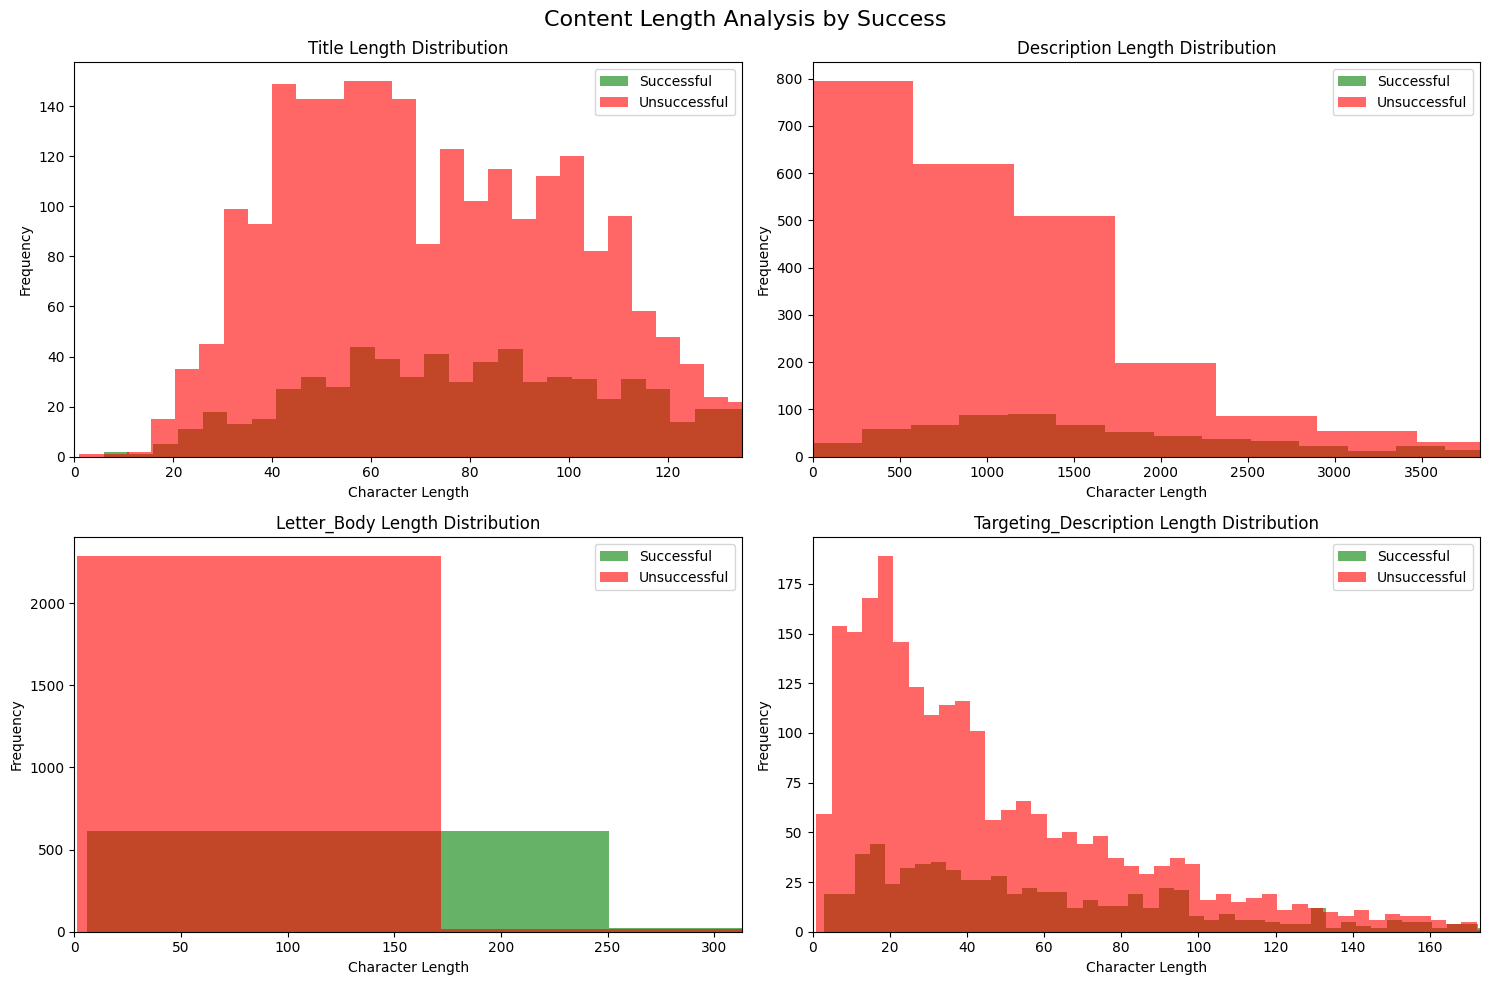


SENTIMENT & EMOTIONAL TONE ANALYSIS

SENTIMENT ANALYSIS: TITLE
----------------------------------------
Successful petitions - avg sentiment: -0.012
Unsuccessful petitions - avg sentiment: -0.022
Sentiment difference: 0.010

SUCCESS RATES BY SENTIMENT CATEGORY:
 Negative: 22.5% success rate (1,107 petitions)
 Neutral: 22.9% success rate (987 petitions)
 Positive: 24.3% success rate (987 petitions)
Emotional intensity - Successful: 0.213, Unsuccessful: 0.221

SENTIMENT ANALYSIS: DESCRIPTION
----------------------------------------
Successful petitions - avg sentiment: 0.013
Unsuccessful petitions - avg sentiment: 0.003
Sentiment difference: 0.010

SUCCESS RATES BY SENTIMENT CATEGORY:
 Negative: 23.3% success rate (1,475 petitions)
 Neutral: 15.5% success rate (103 petitions)
 Positive: 23.7% success rate (1,503 petitions)
Emotional intensity - Successful: 0.196, Unsuccessful: 0.211

SENTIMENT ANALYSIS: LETTER_BODY
----------------------------------------
Successful petitions - avg sent

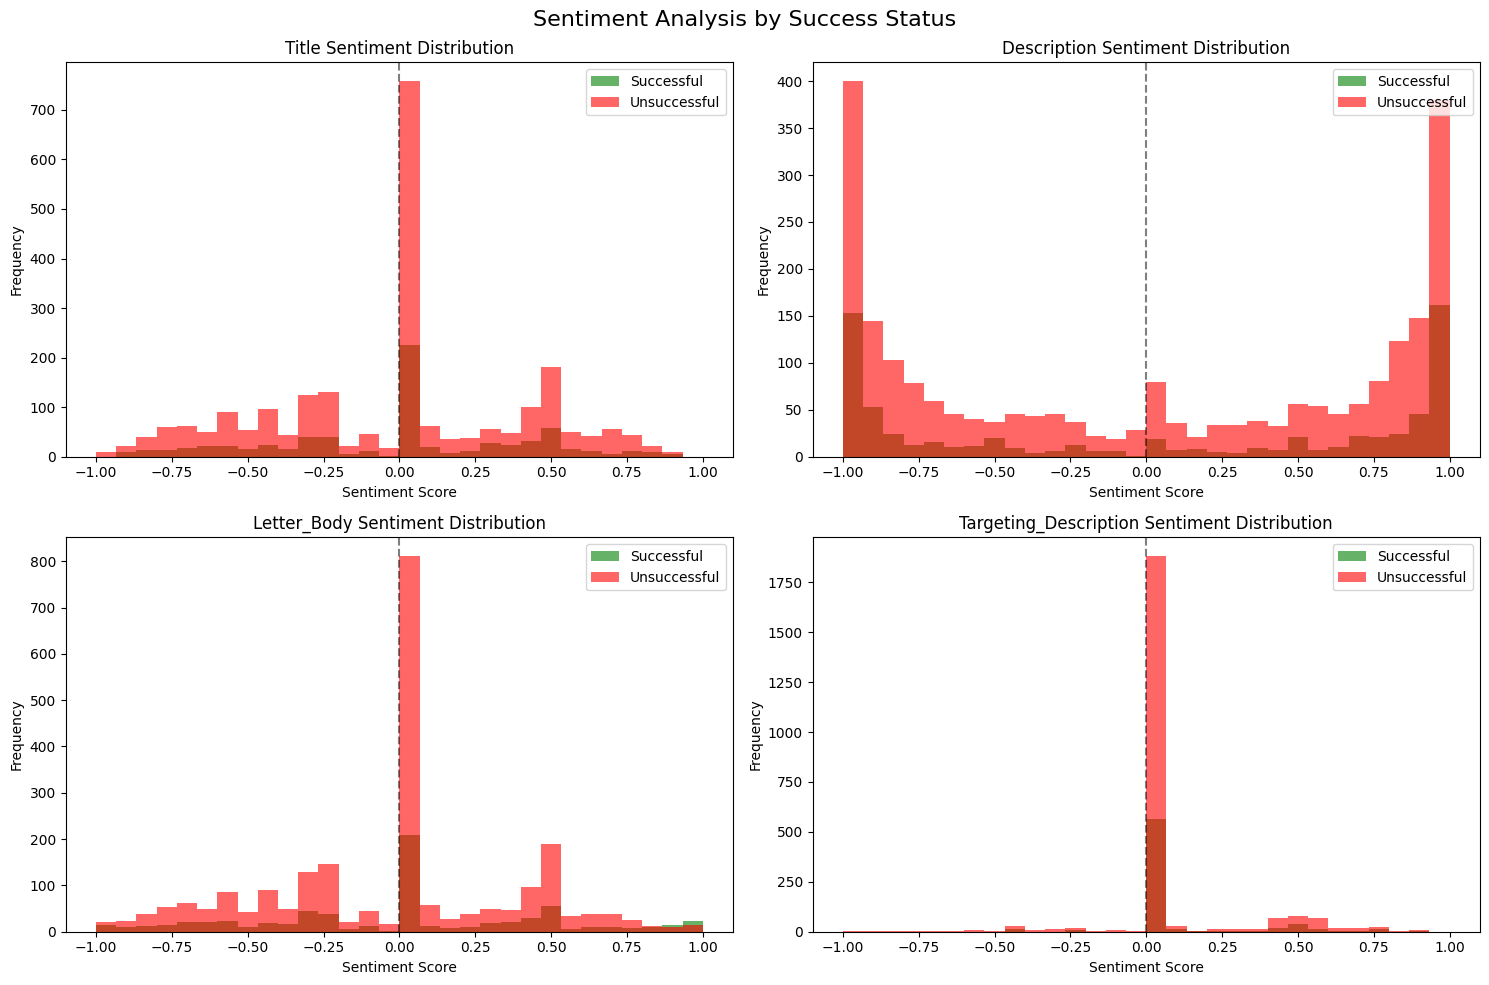

In [48]:
# Change.org Petition Analysis: Success Pattern Discovery
# Enhanced Text Analytics & Predictive Modeling for MobilizeNow
# This analysis examines 3,081 Change.org petitions to identify messaging and engagement patterns

# ============================================================================
# PART 1: SETUP AND DATA LOADING
# ============================================================================

# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re
import string
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Text processing libraries
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from textstat import flesch_reading_ease, flesch_kincaid_grade
try:
    from textstat import gunning_fog, automated_readability_index
except ImportError:
    print("Advanced readability metrics not available - using basic metrics only")
    def gunning_fog(text): return 0
    def automated_readability_index(text): return 0

from wordcloud import WordCloud

# Download required NLTK data
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('vader_lexicon', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

# Load the preprocessed dataset
# Replace this path with your actual data file path
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Colab data/MobilizeNow/changeorg_preprocessed.csv')

print("="*60)
print("CHANGE.ORG PETITION ANALYSIS SETUP")
print("="*60)
print(f"Dataset loaded successfully")
print(f"Shape: {df.shape}")
print(f"Columns: {df.shape[1]}")
print(f"Rows: {df.shape[0]}")

# ============================================================================
# PART 2: DATA VALIDATION & QUALITY ASSESSMENT
# ============================================================================

print("\n" + "="*60)
print("DATA VALIDATION & QUALITY ASSESSMENT")
print("="*60)

# Basic dataset information
print(f"Dataset shape: {df.shape}")
print(f"Total petitions: {len(df):,}")
print(f"Total features: {df.shape[1]}")

# Target variable validation
if 'target_success' in df.columns:
    success_rate = df['target_success'].mean()
    success_count = df['target_success'].sum()
    print(f"\nTarget Variable Validation:")
    print(f"Success rate: {success_rate:.1%} ({success_count:,} successful petitions)")
    print(f"Class balance: {(1-success_rate):.1%} unsuccessful / {success_rate:.1%} successful")

    # Success pathway breakdown
    print(f"\nSuccess Pathway Analysis:")
    if 'is_victory' in df.columns:
        official_victories = df['is_victory'].sum()
        print(f"Official victories: {official_victories} ({official_victories/len(df):.1%})")

    # Calculate high efficiency and high scale thresholds
    if 'signatures_per_day' in df.columns:
        high_efficiency = (df['signatures_per_day'] >= df['signatures_per_day'].quantile(0.80)).sum()
        print(f"High efficiency (top 20%): {high_efficiency} ({high_efficiency/len(df):.1%})")

    if 'total_signature_count' in df.columns:
        high_scale = (df['total_signature_count'] >= df['total_signature_count'].quantile(0.80)).sum()
        print(f"High scale (top 20%): {high_scale} ({high_scale/len(df):.1%})")

# Missing data assessment
print(f"\nMISSING DATA ASSESSMENT:")
print("-" * 40)
total_missing = df.isnull().sum()
missing_pct = (total_missing / len(df)) * 100
missing_summary = pd.DataFrame({
    'Missing_Count': total_missing,
    'Missing_Percentage': missing_pct
})

missing_data = missing_summary[missing_summary['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)
if len(missing_data) > 0:
    print("Variables with missing data:")
    print(missing_data.head(10))
else:
    print("No missing values detected in dataset")

# ============================================================================
# PART 3: FEATURE DISTRIBUTION ANALYSIS
# ============================================================================

print("\n" + "="*60)
print("FEATURE DISTRIBUTION ANALYSIS")
print("="*60)

# Define key features for analysis
performance_metrics = ['signatures_per_day', 'signatures_per_view', 'duration_days']
engagement_metrics = ['total_signature_count', 'total_page_views']
activity_flags = ['has_daily_activity', 'has_weekly_activity', 'has_monthly_activity']

# Performance metrics analysis
print("PERFORMANCE METRICS SUMMARY:")
print("-" * 40)
for metric in performance_metrics:
    if metric in df.columns:
        stats_summary = df[metric].describe()
        skewness = df[metric].skew()
        print(f"\n{metric}:")
        print(f" Range: {stats_summary['min']:.2f} to {stats_summary['max']:.2f}")
        print(f" Median: {stats_summary['50%']:.2f}")
        print(f" Mean: {stats_summary['mean']:.2f}")
        print(f" Skewness: {skewness:.2f}")

# Activity patterns analysis
print(f"\nACTIVITY PATTERNS SUMMARY:")
print("-" * 40)
for activity in activity_flags:
    if activity in df.columns:
        activity_rate = df[activity].mean()
        print(f"{activity}: {activity_rate:.1%} of petitions show this activity")

# Create distribution visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Key Feature Distributions', fontsize=16)

# Plot distributions for key metrics
if 'signatures_per_day' in df.columns:
    axes[0,0].hist(np.log1p(df['signatures_per_day']), bins=50, alpha=0.7, color='blue')
    axes[0,0].set_title('Log(Signatures per Day)')
    axes[0,0].set_xlabel('Log(Signatures per Day)')
    axes[0,0].set_ylabel('Frequency')

if 'total_signature_count' in df.columns:
    axes[0,1].hist(np.log1p(df['total_signature_count']), bins=50, alpha=0.7, color='green')
    axes[0,1].set_title('Log(Total Signature Count)')
    axes[0,1].set_xlabel('Log(Total Signatures)')
    axes[0,1].set_ylabel('Frequency')

if 'total_page_views' in df.columns:
    axes[1,0].hist(np.log1p(df['total_page_views']), bins=50, alpha=0.7, color='orange')
    axes[1,0].set_title('Log(Total Page Views)')
    axes[1,0].set_xlabel('Log(Page Views)')
    axes[1,0].set_ylabel('Frequency')

if 'duration_days' in df.columns:
    axes[1,1].hist(df['duration_days'], bins=50, alpha=0.7, color='red')
    axes[1,1].set_title('Campaign Duration (Days)')
    axes[1,1].set_xlabel('Duration (Days)')
    axes[1,1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# ============================================================================
# PART 4: BIVARIATE ANALYSIS - CATEGORICAL VARIABLES
# ============================================================================

from scipy.stats import chi2_contingency, mannwhitneyu

print("\n" + "="*60)
print("BIVARIATE ANALYSIS: CATEGORICAL VARIABLES")
print("="*60)

# Define categorical variables for analysis
categorical_vars = [
    'petition_status', 'is_victory', 'is_verified_victory', 'is_pledge',
    'sponsored_campaign', 'hide_comments', 'hide_dm_action_panel',
    'enable_human_verification', 'original_locale', 'has_location',
    'is_active', 'has_end_date', 'has_daily_activity', 'has_weekly_activity',
    'has_monthly_activity'
]

# Filter to existing columns
existing_categorical = [var for var in categorical_vars if var in df.columns]
print("Categorical Variable Analysis:")
print("Variable".ljust(25) + "Chi-square".ljust(12) + "p-value".ljust(12) + "Significant".ljust(12) + "Success Rate Diff")
print("-" * 80)

categorical_results = {}
for var in existing_categorical:
    if 'target_success' in df.columns:
        # Create contingency table
        contingency_table = pd.crosstab(df[var], df['target_success'])

        # Chi-square test
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)

        # Success rates by category
        success_rates = df.groupby(var)['target_success'].mean()
        success_rate_diff = success_rates.max() - success_rates.min()

        # Statistical significance
        is_significant = "Yes" if p_value < 0.05 else "No"

        # Store results
        categorical_results[var] = {
            'chi2': chi2,
            'p_value': p_value,
            'significant': is_significant,
            'success_rate_diff': success_rate_diff,
            'success_rates': success_rates
        }

        # Print summary
        print(f"{var[:24].ljust(25)}{chi2:.2f}".ljust(12) +
              f"{p_value:.4f}".ljust(12) +
              f"{is_significant}".ljust(12) +
              f"{success_rate_diff:.1%}")

# Identify most significant categorical predictors
significant_categorical = {k: v for k, v in categorical_results.items() if v['p_value'] < 0.05}
print(f"\nSIGNIFICANT CATEGORICAL PREDICTORS: {len(significant_categorical)}")
for var in sorted(significant_categorical.keys(), key=lambda x: categorical_results[x]['p_value']):
    print(f" {var}: p-value = {categorical_results[var]['p_value']:.4f}")

# ============================================================================
# PART 5: BIVARIATE ANALYSIS - NUMERICAL VARIABLES
# ============================================================================

print("\n" + "="*60)
print("BIVARIATE ANALYSIS: NUMERICAL VARIABLES")
print("="*60)

# Define numerical variables for analysis
numerical_vars = [
    'total_signature_count', 'total_page_views', 'signatures_per_day',
    'signatures_per_view', 'views_per_signature', 'duration_days',
    'recent_weekly_momentum', 'recent_monthly_momentum', 'progress'
]

# Filter to existing columns
existing_numerical = [var for var in numerical_vars if var in df.columns]
print("Numerical Variable Analysis:")
print("Variable".ljust(25) + "Unsuccessful Med".ljust(16) + "Successful Med".ljust(16) +
      "p-value".ljust(12) + "Correlation".ljust(12) + "Significant")
print("-" * 95)

numerical_results = {}
for var in existing_numerical:
    if 'target_success' in df.columns:
        # Split by success status
        unsuccessful = df[df['target_success'] == 0][var].dropna()
        successful = df[df['target_success'] == 1][var].dropna()

        # Mann-Whitney U test
        if len(unsuccessful) > 0 and len(successful) > 0:
            statistic, p_value = mannwhitneyu(unsuccessful, successful, alternative='two-sided')

            # Correlation with success
            correlation = df[var].corr(df['target_success'])

            # Medians
            unsuccessful_median = unsuccessful.median()
            successful_median = successful.median()

            # Statistical significance
            is_significant = "Yes" if p_value < 0.05 else "No"

            # Store results
            numerical_results[var] = {
                'unsuccessful_median': unsuccessful_median,
                'successful_median': successful_median,
                'p_value': p_value,
                'correlation': correlation,
                'significant': is_significant
            }

            # Print summary
            print(f"{var[:24].ljust(25)}{unsuccessful_median:.2f}".ljust(16) +
                  f"{successful_median:.2f}".ljust(16) +
                  f"{p_value:.4f}".ljust(12) +
                  f"{correlation:.4f}".ljust(12) +
                  f"{is_significant}")

# Identify strongest numerical predictors
significant_numerical = {k: v for k, v in numerical_results.items() if v['p_value'] < 0.05}
print(f"\nSTRONGEST NUMERICAL PREDICTORS (by correlation):")
sorted_by_correlation = sorted(significant_numerical.items(), key=lambda x: abs(x[1]['correlation']), reverse=True)
for var, stats in sorted_by_correlation[:5]:
    print(f" {var}: r = {stats['correlation']:.4f}, p = {stats['p_value']:.4f}")

# ============================================================================
# PART 6: SUCCESS PATTERN DEEP DIVE
# ============================================================================

print("\n" + "="*60)
print("SUCCESS PATTERN DEEP DIVE")
print("="*60)

if 'target_success' in df.columns:
    # Success pathway overlap analysis
    print("SUCCESS PATHWAY OVERLAP ANALYSIS:")
    print("-" * 40)

    # Define success pathways
    if all(col in df.columns for col in ['is_victory', 'signatures_per_day', 'total_signature_count']):
        is_official_victory = df['is_victory']
        is_high_efficiency = df['signatures_per_day'] >= df['signatures_per_day'].quantile(0.80)
        is_high_scale = df['total_signature_count'] >= df['total_signature_count'].quantile(0.80)

        # Calculate overlaps
        victory_only = is_official_victory & ~is_high_efficiency & ~is_high_scale
        efficiency_only = ~is_official_victory & is_high_efficiency & ~is_high_scale
        scale_only = ~is_official_victory & ~is_high_efficiency & is_high_scale
        multiple_pathways = (is_official_victory.astype(int) + is_high_efficiency.astype(int) + is_high_scale.astype(int)) > 1

        print(f"Victory only: {victory_only.sum()} ({victory_only.mean():.1%})")
        print(f"Efficiency only: {efficiency_only.sum()} ({efficiency_only.mean():.1%})")
        print(f"Scale only: {scale_only.sum()} ({scale_only.mean():.1%})")
        print(f"Multiple pathways: {multiple_pathways.sum()} ({multiple_pathways.mean():.1%})")

    # Performance profiles
    print(f"\nPERFORMANCE PROFILES:")
    print("-" * 40)

    successful_petitions = df[df['target_success'] == 1]
    unsuccessful_petitions = df[df['target_success'] == 0]

    key_metrics = ['signatures_per_day', 'total_signature_count', 'total_page_views', 'signatures_per_view', 'duration_days']
    for metric in key_metrics:
        if metric in df.columns:
            succ_median = successful_petitions[metric].median()
            unsucc_median = unsuccessful_petitions[metric].median()
            ratio = succ_median / unsucc_median if unsucc_median > 0 else float('inf')

            print(f"\n{metric}:")
            print(f" Successful median: {succ_median:.2f}")
            print(f" Unsuccessful median: {unsucc_median:.2f}")
            print(f" Success advantage: {ratio:.1f}x")

    # Activity pattern analysis
    print(f"\nACTIVITY PATTERN ANALYSIS:")
    print("-" * 40)
    activity_vars = ['has_daily_activity', 'has_weekly_activity', 'has_monthly_activity']
    for activity in activity_vars:
        if activity in df.columns:
            succ_rate = successful_petitions[activity].mean()
            unsucc_rate = unsuccessful_petitions[activity].mean()
            print(f"{activity}:")
            print(f" Successful petitions: {succ_rate:.1%}")
            print(f" Unsuccessful petitions: {unsucc_rate:.1%}")
            print(f" Difference: {succ_rate - unsucc_rate:+.1%}")

# ============================================================================
# PART 7: TEXT DATA PREPARATION
# ============================================================================

print("\n" + "="*60)
print("TEXT ANALYTICS & MESSAGING PATTERN DISCOVERY")
print("="*60)

# Verify text columns exist and examine content
text_columns = ['title', 'description', 'letter_body', 'targeting_description']
available_text_cols = [col for col in text_columns if col in df.columns]
print(f"Available text columns: {available_text_cols}")
print(f"Total petitions for text analysis: {len(df):,}")

# Basic text data quality check
for col in available_text_cols:
    non_null_count = df[col].notna().sum()
    avg_length = df[col].str.len().mean()
    print(f"{col}: {non_null_count:,} non-null ({non_null_count/len(df):.1%}), avg length: {avg_length:.0f} chars")

# Sample successful vs unsuccessful titles for initial inspection
if 'target_success' in df.columns and 'title' in available_text_cols:
    print(f"\nSAMPLE SUCCESSFUL PETITION TITLES:")
    print("-" * 40)
    successful_sample = df[df['target_success'] == 1]['title'].sample(min(5, len(df[df['target_success'] == 1])), random_state=42)
    for i, title in enumerate(successful_sample, 1):
        print(f"{i}. {title[:100]}...")

    print(f"\nSAMPLE UNSUCCESSFUL PETITION TITLES:")
    print("-" * 40)
    unsuccessful_sample = df[df['target_success'] == 0]['title'].sample(min(5, len(df[df['target_success'] == 0])), random_state=42)
    for i, title in enumerate(unsuccessful_sample, 1):
        print(f"{i}. {title[:100]}...")

# ============================================================================
# PART 8: ENHANCED TEXT PREPROCESSING FUNCTIONS
# ============================================================================

# Define comprehensive text analysis functions
def clean_html(text):
    """Remove HTML tags and clean text for analysis"""
    if pd.isna(text):
        return ""
    # Remove HTML tags
    clean = re.sub('<.*?>', '', str(text))
    # Remove extra whitespace
    clean = ' '.join(clean.split())
    return clean

def count_html_tags(text):
    """Count HTML formatting tags in text"""
    if pd.isna(text):
        return 0
    return len(re.findall('<.*?>', str(text)))

def safe_sent_tokenize(text):
    """Safe sentence tokenization with fallback"""
    try:
        return sent_tokenize(text)
    except:
        # Fallback: split on common sentence endings
        sentences = re.split(r'[.!?]+', text)
        return [s.strip() for s in sentences if s.strip()]

def safe_word_tokenize(text):
    """Safe word tokenization with fallback"""
    try:
        return word_tokenize(text)
    except:
        # Fallback: simple split
        return text.split()

def calculate_advanced_readability(text):
    """Calculate comprehensive readability and text quality metrics"""
    if pd.isna(text) or len(str(text).strip()) < 10:
        return {
            'flesch_ease': 0, 'flesch_kincaid': 0, 'gunning_fog': 0,
            'automated_readability': 0, 'avg_sentence_length': 0,
            'avg_word_length': 0, 'vocab_diversity': 0, 'caps_ratio': 0
        }

    clean_text = clean_html(text)

    try:
        # Basic readability scores
        flesch_ease = flesch_reading_ease(clean_text)
        flesch_kincaid = flesch_kincaid_grade(clean_text)

        # Additional readability metrics
        gunning_fog_score = gunning_fog(clean_text)
        automated_readability = automated_readability_index(clean_text)

    except:
        flesch_ease = flesch_kincaid = gunning_fog_score = automated_readability = 0

    # Text structure analysis
    try:
        sentences = safe_sent_tokenize(clean_text)
        words = safe_word_tokenize(clean_text)

        avg_sentence_length = len(words) / len(sentences) if sentences else 0
        avg_word_length = sum(len(word) for word in words) / len(words) if words else 0

        # Vocabulary diversity
        unique_words = set(word.lower() for word in words if word.isalpha())
        vocab_diversity = len(unique_words) / len(words) if words else 0

        # Capitalization analysis (shouting detection)
        caps_words = sum(1 for word in words if word.isupper() and len(word) > 1)
        caps_ratio = caps_words / len(words) if words else 0

    except:
        avg_sentence_length = avg_word_length = vocab_diversity = caps_ratio = 0

    return {
        'flesch_ease': flesch_ease,
        'flesch_kincaid': flesch_kincaid,
        'gunning_fog': gunning_fog_score,
        'automated_readability': automated_readability,
        'avg_sentence_length': avg_sentence_length,
        'avg_word_length': avg_word_length,
        'vocab_diversity': vocab_diversity,
        'caps_ratio': caps_ratio
    }

def count_keywords(text, keywords):
    """Count keyword occurrences in text"""
    if pd.isna(text):
        return 0
    clean_text = clean_html(text).lower()
    count = 0
    for keyword in keywords:
        count += clean_text.count(keyword.lower())
    return count

print("Text preprocessing functions defined successfully")

# ============================================================================
# PART 9: CONTENT LENGTH AND STRUCTURE ANALYSIS
# ============================================================================

print("\n" + "="*60)
print("CONTENT STRUCTURE & LENGTH ANALYSIS")
print("="*60)

# Analyze content length patterns
print("CONTENT LENGTH ANALYSIS:")
print("-" * 40)

length_analysis = {}
for col in available_text_cols:
    # Calculate lengths
    df[f'{col}_length'] = df[col].str.len().fillna(0)
    df[f'{col}_clean_length'] = df[col].apply(clean_html).str.len()
    df[f'{col}_word_count'] = df[col].apply(clean_html).str.split().str.len().fillna(0)

    if col == 'description':
        df[f'{col}_html_tags'] = df[col].apply(count_html_tags)

    if 'target_success' in df.columns:
        # Compare successful vs unsuccessful
        successful_lengths = df[df['target_success'] == 1][f'{col}_clean_length']
        unsuccessful_lengths = df[df['target_success'] == 0][f'{col}_clean_length']

        # Store analysis results
        length_analysis[col] = {
            'successful_median': successful_lengths.median(),
            'unsuccessful_median': unsuccessful_lengths.median(),
            'successful_mean': successful_lengths.mean(),
            'unsuccessful_mean': unsuccessful_lengths.mean(),
            'advantage_ratio': successful_lengths.median() / unsuccessful_lengths.median() if unsuccessful_lengths.median() > 0 else float('inf')
        }

        print(f"\n{col.upper()}:")
        print(f" Successful median length: {successful_lengths.median():.0f} characters")
        print(f" Unsuccessful median length: {unsuccessful_lengths.median():.0f} characters")
        print(f" Success advantage: {length_analysis[col]['advantage_ratio']:.2f}x")
        print(f" Successful mean words: {df[df['target_success'] == 1][f'{col}_word_count'].mean():.0f}")
        print(f" Unsuccessful mean words: {df[df['target_success'] == 0][f'{col}_word_count'].mean():.0f}")

# HTML formatting analysis for descriptions
if 'description' in available_text_cols and 'target_success' in df.columns:
    print(f"\nHTML FORMATTING ANALYSIS:")
    print("-" * 40)
    successful_html = df[df['target_success'] == 1]['description_html_tags']
    unsuccessful_html = df[df['target_success'] == 0]['description_html_tags']
    print(f"Successful petitions - avg HTML tags: {successful_html.mean():.1f}")
    print(f"Unsuccessful petitions - avg HTML tags: {unsuccessful_html.mean():.1f}")
    print(f"HTML formatting advantage: {successful_html.mean() / unsuccessful_html.mean():.2f}x")

# Optimal length analysis
if 'title' in available_text_cols and 'target_success' in df.columns:
    print(f"\nOPTIMAL LENGTH ANALYSIS:")
    print("-" * 40)
    df['title_length_quartile'] = pd.qcut(df['title_clean_length'], q=4, labels=['Short', 'Medium-Short', 'Medium-Long', 'Long'])
    title_length_success = df.groupby('title_length_quartile')['target_success'].agg(['count', 'mean'])
    title_length_success.columns = ['Total_Petitions', 'Success_Rate']
    title_length_success['Success_Rate'] *= 100
    print("TITLE LENGTH vs SUCCESS RATE:")
    print(title_length_success.round(1))

    best_quartile = title_length_success['Success_Rate'].idxmax()
    print(f"\nOptimal title length: {best_quartile} quartile")

# Visualize length distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Content Length Analysis by Success', fontsize=16)

if 'target_success' in df.columns:
    for idx, col in enumerate(available_text_cols[:4]):
        row, col_idx = idx // 2, idx % 2

        if f'{col}_clean_length' in df.columns:
            successful_lengths = df[df['target_success'] == 1][f'{col}_clean_length']
            unsuccessful_lengths = df[df['target_success'] == 0][f'{col}_clean_length']

            axes[row, col_idx].hist(successful_lengths, bins=50, alpha=0.6, label='Successful', color='green')
            axes[row, col_idx].hist(unsuccessful_lengths, bins=50, alpha=0.6, label='Unsuccessful', color='red')
            axes[row, col_idx].set_title(f'{col.title()} Length Distribution')
            axes[row, col_idx].set_xlabel('Character Length')
            axes[row, col_idx].set_ylabel('Frequency')
            axes[row, col_idx].legend()
            axes[row, col_idx].set_xlim(0, df[f'{col}_clean_length'].quantile(0.95))

plt.tight_layout()
plt.show()

# ============================================================================
# PART 10: ENHANCED SENTIMENT ANALYSIS
# ============================================================================

print("\n" + "="*60)
print("SENTIMENT & EMOTIONAL TONE ANALYSIS")
print("="*60)

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

def get_sentiment_scores(text):
    """Get comprehensive sentiment scores"""
    if pd.isna(text):
        return {'compound': 0, 'pos': 0, 'neg': 0, 'neu': 0}
    clean_text = clean_html(text)
    scores = sia.polarity_scores(clean_text)
    return scores

# Analyze sentiment across text components
sentiment_results = {}
for col in available_text_cols:
    print(f"\nSENTIMENT ANALYSIS: {col.upper()}")
    print("-" * 40)

    # Calculate sentiment scores
    sentiment_scores = df[col].apply(get_sentiment_scores)

    # Extract individual scores
    df[f'{col}_sentiment_compound'] = [score['compound'] for score in sentiment_scores]
    df[f'{col}_sentiment_positive'] = [score['pos'] for score in sentiment_scores]
    df[f'{col}_sentiment_negative'] = [score['neg'] for score in sentiment_scores]
    df[f'{col}_sentiment_neutral'] = [score['neu'] for score in sentiment_scores]

    # Categorize sentiment
    df[f'{col}_sentiment_category'] = df[f'{col}_sentiment_compound'].apply(
        lambda x: 'Positive' if x >= 0.05 else 'Negative' if x <= -0.05 else 'Neutral'
    )

    # Emotional intensity (sum of positive and negative scores)
    df[f'{col}_emotional_intensity'] = df[f'{col}_sentiment_positive'] + df[f'{col}_sentiment_negative']

    if 'target_success' in df.columns:
        # Compare successful vs unsuccessful
        successful_sentiment = df[df['target_success'] == 1][f'{col}_sentiment_compound']
        unsuccessful_sentiment = df[df['target_success'] == 0][f'{col}_sentiment_compound']

        print(f"Successful petitions - avg sentiment: {successful_sentiment.mean():.3f}")
        print(f"Unsuccessful petitions - avg sentiment: {unsuccessful_sentiment.mean():.3f}")
        print(f"Sentiment difference: {successful_sentiment.mean() - unsuccessful_sentiment.mean():.3f}")

        # Sentiment category distribution
        sentiment_success_rates = df.groupby(f'{col}_sentiment_category')['target_success'].mean() * 100

        print(f"\nSUCCESS RATES BY SENTIMENT CATEGORY:")
        for category in ['Negative', 'Neutral', 'Positive']:
            if category in sentiment_success_rates.index:
                rate = sentiment_success_rates[category]
                count = df[df[f'{col}_sentiment_category'] == category].shape[0]
                print(f" {category}: {rate:.1f}% success rate ({count:,} petitions)")

        # Store results
        sentiment_results[col] = {
            'successful_avg': successful_sentiment.mean(),
            'unsuccessful_avg': unsuccessful_sentiment.mean(),
            'success_rates_by_category': sentiment_success_rates
        }

        # Emotional intensity analysis
        successful_intensity = df[df['target_success'] == 1][f'{col}_emotional_intensity']
        unsuccessful_intensity = df[df['target_success'] == 0][f'{col}_emotional_intensity']
        print(f"Emotional intensity - Successful: {successful_intensity.mean():.3f}, Unsuccessful: {unsuccessful_intensity.mean():.3f}")

# Create sentiment visualization
if 'target_success' in df.columns and available_text_cols:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Sentiment Analysis by Success Status', fontsize=16)

    for idx, col in enumerate(available_text_cols[:4]):
        row, col_idx = idx // 2, idx % 2

        if f'{col}_sentiment_compound' in df.columns:
            successful_sentiment = df[df['target_success'] == 1][f'{col}_sentiment_compound']
            unsuccessful_sentiment = df[df['target_success'] == 0][f'{col}_sentiment_compound']

            axes[row, col_idx].hist(successful_sentiment, bins=30, alpha=0.6, label='Successful', color='green', range=(-1, 1))
            axes[row, col_idx].hist(unsuccessful_sentiment, bins=30, alpha=0.6, label='Unsuccessful', color='red', range=(-1, 1))
            axes[row, col_idx].set_title(f'{col.title()} Sentiment Distribution')
            axes[row, col_idx].set_xlabel('Sentiment Score')
            axes[row, col_idx].set_ylabel('Frequency')
            axes[row, col_idx].legend()
            axes[row, col_idx].axvline(x=0, color='black', linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()



In [49]:
# ============================================================================
# PART 11: ENHANCED KEYWORD AND LANGUAGE ANALYSIS
# ============================================================================

print("\n" + "="*60)
print("ENHANCED KEYWORD & LANGUAGE ANALYSIS")
print("="*60)

"""
KEYWORD WEIGHTING METHODOLOGY:
Weights based on behavioral psychology research rather than data-driven optimization
to avoid target leakage during feature creation. Production systems could optimize
weights using only training data with cross-validation.

Research Foundation:
- Cialdini (2006): Influence principles (urgency=scarcity, social proof)
- Berger & Milkman (2012): Emotional contagion in viral content
- Digital marketing research: Urgency language effectiveness (HubSpot, 2023)
"""

# Enhanced keyword categories for comprehensive analysis
urgency_keywords = [
    'urgent', 'immediate', 'immediately', 'now', 'today', 'emergency', 'crisis',
    'deadline', 'time running out', "before it's too late", 'last chance',
    'act now', 'breaking', 'critical', 'asap', 'quickly', 'rapidly', 'soon',
    'time sensitive', 'expires', 'final notice', 'running out', 'running out of time',
    'closing soon', 'minutes left', 'hours left', 'act fast', 'clock is ticking',
    'urgent appeal', 'right away', "don't wait", 'rush', 'imminent'
]

action_keywords = [
    'stop', 'save', 'protect', 'demand', 'fight', 'defend', 'prevent',
    'ban', 'end', 'cancel', 'reverse', 'change', 'fix', 'solve',
    'help', 'support', 'join', 'sign', 'act', 'take action', 'make',
    'force', 'require', 'ensure', 'guarantee', 'implement', 'establish',
    'mandate', 'enforce', 'commit', 'pledge', 'promise', 'repeal',
    'prosecute', 'petition', 'regulate', 'authorize', 'decriminalize',
    'ratify', 'investigate', 'propose', 'suspend', 'intervene', 'urge',
    'ask', 'encourage', 'invite', 'participate', 'mobilize'
]

# New powerful keyword categories
power_words = [
    'justice', 'freedom', 'rights', 'equality', 'fair', 'unfair', 'wrong',
    'illegal', 'violation', 'abuse', 'corruption', 'scandal', 'outrage',
    'discrimination', 'injustice', 'betrayal', 'exploitation', 'oppression',
    'accountability', 'threat', 'dangerous', 'complicit', 'cover-up',
    'devastating', 'unjust', 'systemic', 'outrageous', 'unconscionable',
    'inexcusable', 'intolerable', 'unacceptable', 'shameful', 'historic',
    'unprecedented', 'groundbreaking', 'transformative'
]

authority_keywords = [
    'government', 'minister', 'ministry', 'department', 'authority', 'official',
    'court', 'judge', 'police', 'administration', 'commissioner', 'director',
    'secretary', 'chief', 'president', 'prime minister', 'governor', 'congress',
    'senate', 'parliament', 'agency', 'task force', 'ombudsman', 'representative',
    'lawmaker', 'mp', 'council', 'board of directors', 'ceo', 'executive',
    'chairman', 'superintendent', 'mayor', 'supervisor', 'inspector general',
    'attorney general'
]

specificity_keywords = [
    'million', 'thousand', 'billion', 'percent', '%', 'statistics', 'data',
    'study', 'research', 'report', 'evidence', 'facts', 'numbers', 'peer-reviewed',
    'metrics', 'surveys', 'benchmark', 'statistical', 'trend', 'projection', 'figures'
]

# New categories for enhanced analysis
social_proof_keywords = [
    'join thousands', 'others are signing', 'momentum building', 'growing movement',
    'people like you', 'your neighbors', 'community members', 'together we',
    'viral petition', 'everyone is signing', 'shared widely', 'trending now',
    'thousands have joined', 'massive response', 'popular support', 'join your neighbors',
    'be part of history'
]

emotional_keywords = [
    'heartbreaking', 'devastating', 'tragic', 'unthinkable', 'painful', 'outraged',
    'terrified', 'afraid', 'fear', 'anger', 'sad', 'hurt', 'helpless', 'shocked',
    'mourning', 'suffering', 'grief', 'heartbroken', 'in pain', 'crushed', 'violated',
    # Positive emotions for balance
    'hopeful', 'inspired', 'empowered', 'determined', 'passionate', 'proud',
    'excited', 'motivated'
]

# Enhanced CTA patterns for petition detection
cta_patterns = [
    # Direct action requests
    r'\bsign\s+this\b', r'\bsign\s+now\b', r'\bsign\s+the\s+petition\b',
    r'\bjoin\s+us\b', r'\bjoin\s+me\b', r'\bjoin\s+this\b', r'\bjoin\s+the\b',
    r'\bhelp\s+us\b', r'\bhelp\s+me\b', r'\bhelp\s+save\b', r'\bhelp\s+stop\b',
    r'\bsupport\s+this\b', r'\bsupport\s+us\b', r'\bsupport\s+me\b',
    # Action + urgency combinations
    r'\btake\s+action\b', r'\bact\s+now\b', r'\bact\s+today\b', r'\bact\s+immediately\b',
    r'\bmake\s+a\s+difference\b', r'\bmake\s+your\s+voice\s+heard\b',
    r'\bstand\s+with\b', r'\bstand\s+up\b', r'\bspeak\s+up\b',
    # Demand/petition language
    r'\bdemand\s+action\b', r'\bdemand\s+change\b', r'\bdemand\s+justice\b',
    r'\bstop\s+this\b', r'\bstop\s+them\b', r'\bend\s+this\b',
    r'\bforce\s+them\b', r'\bmake\s+them\b',
    # Petition-specific CTAs
    r'\badd\s+your\s+name\b', r'\badd\s+your\s+voice\b', r'\blend\s+your\s+voice\b',
    r'\bshow\s+your\s+support\b', r'\bvoice\s+your\s+support\b',
    r'\blet\s+them\s+know\b', r'\btell\s+them\b', r'\bsend\s+a\s+message\b',
    # Community building CTAs
    r'\btogether\s+we\s+can\b', r'\bwe\s+need\s+your\b', r'\byour\s+signature\b',
    r'\bevery\s+signature\b', r'\beach\s+signature\b', r'\byour\s+voice\s+matters\b',
    # Social sharing CTAs
    r'\bshare\s+this\b', r'\bspread\s+the\s+word\b', r'\btell\s+your\s+friends\b',
    r'\bshare\s+with\b', r'\bpass\s+it\s+on\b',
    # Imperative verbs (petition context)
    r'\bfight\s+for\b', r'\bfight\s+against\b', r'\bdefend\b', r'\bprotect\b',
    r'\bsave\b', r'\bprevent\b', r'\bchange\b', r'\bfix\b', r'\bsolve\b'
]

def calculate_enhanced_keyword_score(text, weights=None):
    """
We have set up the function for ease of user to change weightage of key words and focus on sepcific type of keywords, particularly if they want it to be psychology/behavioral based
    """


    if weights is None:
        weights = {
            'urgency': 1,
            'emotional': 1,
            'social_proof': 1,
            'power': 1,
            'action': 1,     #
            'authority': 1,  #
            'specificity': 1 # M
        }

    if pd.isna(text):
        return 0

    # Calculate weighted score
    score = (
        count_keywords(text, urgency_keywords) * weights['urgency'] +
        count_keywords(text, emotional_keywords) * weights['emotional'] +
        count_keywords(text, social_proof_keywords) * weights['social_proof'] +
        count_keywords(text, power_words) * weights['power'] +
        count_keywords(text, action_keywords) * weights['action'] +
        count_keywords(text, authority_keywords) * weights['authority'] +
        count_keywords(text, specificity_keywords) * weights['specificity']
    )
    return score

# Enhanced text analysis with multiple keyword categories and weighted scoring
for col in available_text_cols:
    print(f"\nENHANCED TEXT ANALYSIS: {col.upper()}")
    print("-" * 40)

    # Original keyword counts (for backward compatibility)
    df[f'{col}_urgency_count'] = df[col].apply(lambda x: count_keywords(x, urgency_keywords))
    df[f'{col}_action_count'] = df[col].apply(lambda x: count_keywords(x, action_keywords))
    df[f'{col}_has_urgency'] = df[f'{col}_urgency_count'] > 0
    df[f'{col}_has_action'] = df[f'{col}_action_count'] > 0

    # Enhanced keyword categories
    df[f'{col}_power_count'] = df[col].apply(lambda x: count_keywords(x, power_words))
    df[f'{col}_authority_count'] = df[col].apply(lambda x: count_keywords(x, authority_keywords))
    df[f'{col}_specificity_count'] = df[col].apply(lambda x: count_keywords(x, specificity_keywords))
    df[f'{col}_social_proof_count'] = df[col].apply(lambda x: count_keywords(x, social_proof_keywords))
    df[f'{col}_emotional_count'] = df[col].apply(lambda x: count_keywords(x, emotional_keywords))

    # Weighted strategic scoring (NEW FEATURE)
    df[f'{col}_weighted_keyword_score'] = df[col].apply(calculate_enhanced_keyword_score)

    # Call-to-action detection
    df[f'{col}_cta_count'] = df[col].apply(
        lambda x: sum(len(re.findall(pattern, str(x).lower())) for pattern in cta_patterns) if pd.notna(x) else 0
    )
    df[f'{col}_has_cta'] = (df[f'{col}_cta_count'] > 0).astype(int)

    # Numbers and statistics detection
    df[f'{col}_numbers_count'] = df[col].str.count(r'\d+').fillna(0)
    df[f'{col}_has_statistics'] = df[col].str.contains(
        r'\d+%|\d+\s*(percent|million|thousand|billion)', case=False, na=False).fillna(False).astype(int)

    # Text structure analysis
    df[f'{col}_paragraph_count'] = df[col].apply(
        lambda x: len([p for p in str(x).split('\n') if p.strip()]) if pd.notna(x) else 0
    )

    # Question analysis
    df[f'{col}_question_count'] = df[col].str.count(r'\?').fillna(0)

    # Enhanced readability metrics
    readability_scores = df[col].apply(calculate_advanced_readability)
    df[f'{col}_flesch_ease'] = [score['flesch_ease'] for score in readability_scores]
    df[f'{col}_flesch_kincaid'] = [score['flesch_kincaid'] for score in readability_scores]
    df[f'{col}_gunning_fog'] = [score['gunning_fog'] for score in readability_scores]
    df[f'{col}_automated_readability'] = [score['automated_readability'] for score in readability_scores]
    df[f'{col}_vocab_diversity'] = [score['vocab_diversity'] for score in readability_scores]
    df[f'{col}_caps_ratio'] = [score['caps_ratio'] for score in readability_scores]
    df[f'{col}_avg_sentence_length'] = [score['avg_sentence_length'] for score in readability_scores]
    df[f'{col}_avg_word_length'] = [score['avg_word_length'] for score in readability_scores]

    if 'target_success' in df.columns:
        # Compare successful vs unsuccessful for enhanced features
        successful_urgency = df[df['target_success'] == 1][f'{col}_urgency_count'].mean()
        unsuccessful_urgency = df[df['target_success'] == 0][f'{col}_urgency_count'].mean()
        successful_action = df[df['target_success'] == 1][f'{col}_action_count'].mean()
        unsuccessful_action = df[df['target_success'] == 0][f'{col}_action_count'].mean()

        print(f"Urgency keywords:")
        print(f" Successful: {successful_urgency:.2f} avg per petition")
        print(f" Unsuccessful: {unsuccessful_urgency:.2f} avg per petition")
        print(f" Advantage: {successful_urgency / unsuccessful_urgency:.2f}x" if unsuccessful_urgency > 0 else " Advantage: N/A")

        print(f"Action keywords:")
        print(f" Successful: {successful_action:.2f} avg per petition")
        print(f" Unsuccessful: {unsuccessful_action:.2f} avg per petition")
        print(f" Advantage: {successful_action / unsuccessful_action:.2f}x" if unsuccessful_action > 0 else " Advantage: N/A")

        # Enhanced keyword analysis
        for keyword_type in ['power', 'social_proof', 'emotional', 'authority']:
            successful_count = df[df['target_success'] == 1][f'{col}_{keyword_type}_count'].mean()
            unsuccessful_count = df[df['target_success'] == 0][f'{col}_{keyword_type}_count'].mean()

            print(f"{keyword_type.replace('_', ' ').title()} keywords:")
            print(f" Successful: {successful_count:.2f} avg per petition")
            print(f" Unsuccessful: {unsuccessful_count:.2f} avg per petition")
            print(f" Advantage: {successful_count / unsuccessful_count:.2f}x" if unsuccessful_count > 0 else " Advantage: N/A")

        # Weighted scoring analysis (NEW)
        successful_weighted = df[df['target_success'] == 1][f'{col}_weighted_keyword_score'].mean()
        unsuccessful_weighted = df[df['target_success'] == 0][f'{col}_weighted_keyword_score'].mean()

        print(f"Weighted Keyword Score (Psychology-Based):")
        print(f" Successful: {successful_weighted:.2f} avg score")
        print(f" Unsuccessful: {unsuccessful_weighted:.2f} avg score")
        print(f" Advantage: {successful_weighted / unsuccessful_weighted:.2f}x" if unsuccessful_weighted > 0 else " Advantage: N/A")

print(f"\nKEYWORD ENHANCEMENT SUMMARY:")
print("-" * 40)
print(f"✅ Urgency keywords expanded: {len(urgency_keywords)} terms")
print(f"✅ Action keywords expanded: {len(action_keywords)} terms")
print(f"✅ New categories added: Social Proof ({len(social_proof_keywords)}), Emotional ({len(emotional_keywords)})")
print(f"✅ Enhanced CTA patterns: {len(cta_patterns)} regex patterns")





ENHANCED KEYWORD & LANGUAGE ANALYSIS

ENHANCED TEXT ANALYSIS: TITLE
----------------------------------------
Urgency keywords:
 Successful: 0.08 avg per petition
 Unsuccessful: 0.03 avg per petition
 Advantage: 2.41x
Action keywords:
 Successful: 0.75 avg per petition
 Unsuccessful: 0.64 avg per petition
 Advantage: 1.18x
Power keywords:
 Successful: 0.15 avg per petition
 Unsuccessful: 0.14 avg per petition
 Advantage: 1.06x
Social Proof keywords:
 Successful: 0.00 avg per petition
 Unsuccessful: 0.00 avg per petition
 Advantage: 0.00x
Emotional keywords:
 Successful: 0.01 avg per petition
 Unsuccessful: 0.01 avg per petition
 Advantage: 0.91x
Authority keywords:
 Successful: 0.69 avg per petition
 Unsuccessful: 0.60 avg per petition
 Advantage: 1.14x
Weighted Keyword Score (Psychology-Based):
 Successful: 1.71 avg score
 Unsuccessful: 1.44 avg score
 Advantage: 1.18x

ENHANCED TEXT ANALYSIS: DESCRIPTION
----------------------------------------
Urgency keywords:
 Successful: 1.65 avg

In [50]:
'''# ============================================================================
# PART X: GOOGLE TRENDS TIMING ANALYSIS INTEGRATION
# Add this INSTEAD of the GDELT section (replace GDELT part entirely)
# ============================================================================
from tqdm import tqdm

print("\n" + "="*60)
print("GOOGLE TRENDS TIMING ANALYSIS INTEGRATION")
print("="*60)

# Install required library
try:
    from pytrends.request import TrendReq
except ImportError:
    print("Installing pytrends library...")
    import subprocess
    subprocess.check_call(['pip', 'install', 'pytrends'])
    from pytrends.request import TrendReq

import time
from datetime import datetime, timedelta

def extract_trends_keywords(title, description, max_keywords=3):
    """
    Extract trend-searchable keywords from petition text
    Focus on broader topics that people actually search for
    """
    # Combine title and description
    text = f"{title} {description}".lower()

    # Clean using your existing function
    clean_text = clean_html(text)

    # Define topic categories that people search for
    search_topics = {
        'environment': ['climate', 'environment', 'pollution', 'renewable', 'green', 'sustainability'],
        'health': ['health', 'medical', 'healthcare', 'hospital', 'disease', 'mental health'],
        'education': ['education', 'school', 'student', 'teacher', 'university', 'learning'],
        'justice': ['justice', 'rights', 'equality', 'discrimination', 'legal', 'court'],
        'animal': ['animal', 'wildlife', 'pet', 'zoo', 'conservation', 'cruelty'],
        'government': ['government', 'policy', 'law', 'regulation', 'politics', 'minister'],
        'technology': ['technology', 'digital', 'internet', 'privacy', 'data', 'cyber'],
        'economic': ['economy', 'job', 'employment', 'wage', 'business', 'financial']
    }

    # Find which categories match the petition
    matched_keywords = []

    for category, keywords in search_topics.items():
        for keyword in keywords:
            if keyword in clean_text:
                matched_keywords.append(keyword)
                break  # Only add one keyword per category

    # If no categories matched, extract most frequent meaningful words
    if not matched_keywords:
        stop_words = {'the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 'by',
                     'please', 'help', 'stop', 'save', 'this', 'that', 'they', 'them', 'their', 'have', 'has',
                     'will', 'would', 'should', 'could', 'can', 'may', 'must', 'need', 'want'}
        words = [word for word in clean_text.split() if len(word) > 4 and word not in stop_words]

        from collections import Counter
        word_freq = Counter(words)
        matched_keywords = [word for word, count in word_freq.most_common(3)]

    # Return top 3 keywords, ensuring they're searchable terms
    final_keywords = []
    for keyword in matched_keywords[:3]:
        if len(keyword) > 3 and keyword.isalpha():  # Valid search terms
            final_keywords.append(keyword)

    return final_keywords[:2]  # Google Trends works better with 1-2 terms

def get_google_trends_context(created_at, keywords, retries=3):
    """
    Get Google Trends data for petition timing analysis
    """
    if not keywords or pd.isna(created_at):
        return {
            'trends_search_volume': 0,
            'trends_timing_score': 0,
            'trends_momentum': 0,
            'trends_api_success': False
        }

    try:
        # Convert created_at date
        if isinstance(created_at, str):
            date_obj = pd.to_datetime(created_at)
        else:
            date_obj = created_at

        # Define time window (4 weeks before petition launch)
        end_date = date_obj
        start_date = end_date - timedelta(days=28)  # 4 weeks before

        # Format for Google Trends
        timeframe = f"{start_date.strftime('%Y-%m-%d')} {end_date.strftime('%Y-%m-%d')}"

        for attempt in range(retries):
            try:
                # Initialize pytrends
                pytrends = TrendReq(hl='en-US', tz=360, timeout=(10,25))

                # Build payload - use first keyword only to avoid errors
                search_term = keywords[0] if keywords else 'news'

                pytrends.build_payload([search_term],
                                     cat=0,  # All categories
                                     timeframe=timeframe,
                                     geo='',  # Worldwide
                                     gprop='')  # Web search

                # Get interest over time
                interest_data = pytrends.interest_over_time()

                if not interest_data.empty and search_term in interest_data.columns:
                    # Calculate metrics
                    values = interest_data[search_term].values

                    # Search volume (average over the period)
                    avg_search_volume = values.mean()

                    # Timing score (value on petition launch date)
                    timing_score = values[-1] if len(values) > 0 else 0  # Last value (closest to petition date)

                    # Momentum (trend direction)
                    if len(values) > 1:
                        momentum = (values[-1] - values[0]) / (values[0] + 1)  # Percentage change
                    else:
                        momentum = 0

                    return {
                        'trends_search_volume': float(avg_search_volume),
                        'trends_timing_score': float(timing_score),
                        'trends_momentum': float(momentum),
                        'trends_api_success': True
                    }
                else:
                    # No data available for this term/timeframe
                    return {
                        'trends_search_volume': 0,
                        'trends_timing_score': 0,
                        'trends_momentum': 0,
                        'trends_api_success': True  # API worked, just no data
                    }

            except Exception as e:
                if attempt < retries - 1:
                    time.sleep(2)  # Brief pause between retries
                    continue
                else:
                    print(f"Google Trends error for {keywords}: {str(e)}")
                    break

    except Exception as e:
        print(f"Error processing Google Trends data: {str(e)}")

    # Return default values on error
    return {
        'trends_search_volume': 0,
        'trends_timing_score': 0,
        'trends_momentum': 0,
        'trends_api_success': False
    }

# Process Google Trends data for your dataset
print("Extracting trend-searchable keywords from petition text...")

# Start with a smaller sample to test (20 petitions)
sample_size = min(20, len(df))
df_sample = df.head(sample_size).copy()

print(f"Testing Google Trends integration with {sample_size} petitions...")
print("Note: This will take ~1 minute (3 seconds per petition to respect rate limits)")

# Initialize new columns
trends_columns = ['trends_search_volume', 'trends_timing_score', 'trends_momentum', 'trends_api_success']
for col in trends_columns:
    df_sample[col] = 0.0

# Process petitions with progress tracking
successful_calls = 0
for idx, row in tqdm(df_sample.iterrows(), total=len(df_sample), desc="Processing Google Trends"):
    try:
        # Extract keywords for trends
        keywords = extract_trends_keywords(row['title'], row['description'])

        if keywords:  # Only process if we have valid keywords
            # Get Google Trends context
            trends_data = get_google_trends_context(row['created_at'], keywords)

            # Update dataframe
            for col, value in trends_data.items():
                df_sample.at[idx, col] = value

            if trends_data['trends_api_success']:
                successful_calls += 1

            # Rate limiting - Google Trends needs 2-3 seconds between requests
            time.sleep(3)
        else:
            print(f"No valid keywords extracted for petition {idx}")

    except Exception as e:
        print(f"Error processing petition {idx}: {str(e)}")
        continue

print(f"\nGoogle Trends integration complete!")
print(f"Successfully processed: {successful_calls}/{len(df_sample)} petitions")
print(f"API success rate: {successful_calls/len(df_sample)*100:.1f}%")

# Analyze Google Trends data quality and distribution
print(f"\nGOOGLE TRENDS DATA QUALITY ASSESSMENT:")
print("-" * 40)
print(f"Average search volume: {df_sample['trends_search_volume'].mean():.1f}")
print(f"Average timing score: {df_sample['trends_timing_score'].mean():.1f}")
print(f"Average momentum: {df_sample['trends_momentum'].mean():.3f}")
print(f"Petitions with search data: {(df_sample['trends_search_volume'] > 0).sum()} ({(df_sample['trends_search_volume'] > 0).mean()*100:.1f}%)")

# Quick correlation analysis with your success metric
if 'target_success' in df_sample.columns:
    print(f"\nGOOGLE TRENDS CORRELATION WITH SUCCESS:")
    print("-" * 40)

    correlations = {}
    for col in ['trends_search_volume', 'trends_timing_score', 'trends_momentum']:
        if df_sample[col].std() > 0:  # Avoid division by zero
            corr = df_sample[col].corr(df_sample['target_success'])
            correlations[col] = corr
            print(f"{col}: {corr:+.4f}")

    # Find highest correlation
    if correlations:
        best_feature = max(correlations.keys(), key=lambda x: abs(correlations[x]))
        print(f"\nStrongest Google Trends predictor: {best_feature} (r = {correlations[best_feature]:+.4f})")

# Show some example results
print(f"\nSAMPLE RESULTS:")
print("-" * 40)
sample_results = df_sample[df_sample['trends_api_success'] == True].head(3)
for idx, row in sample_results.iterrows():
    keywords = extract_trends_keywords(row['title'], row['description'])
    print(f"\nPetition: {row['title'][:50]}...")
    print(f"Keywords: {keywords}")
    print(f"Search Volume: {row['trends_search_volume']:.1f}")
    print(f"Timing Score: {row['trends_timing_score']:.1f}")
    print(f"Momentum: {row['trends_momentum']:+.3f}")

# Save enhanced dataset
df_sample.to_csv('petition_data_with_trends.csv', index=False)
print(f"\nEnhanced dataset saved to 'petition_data_with_trends.csv'")

# Decision point for full dataset processing
if successful_calls > sample_size * 0.6:  # If >60% success rate
    process_full = input(f"\nGoogle Trends integration looks promising! Process full dataset ({len(df)} petitions)? This will take ~{len(df)*3/60:.0f} minutes. (y/n): ")

    if process_full.lower() == 'y':
        print("Processing full dataset with Google Trends...")

        # Initialize columns for full dataset
        for col in trends_columns:
            if col not in df.columns:
                df[col] = 0.0

        # Process in batches to manage API calls
        batch_size = 25
        total_batches = (len(df) - 1) // batch_size + 1

        for i in range(0, len(df), batch_size):
            batch = df.iloc[i:i+batch_size]
            current_batch = i // batch_size + 1
            print(f"Processing batch {current_batch}/{total_batches} (petitions {i+1}-{min(i+batch_size, len(df))})")

            for idx in batch.index:
                row = df.loc[idx]
                keywords = extract_trends_keywords(row['title'], row['description'])

                if keywords:
                    trends_data = get_google_trends_context(row['created_at'], keywords)

                    for col, value in trends_data.items():
                        df.at[idx, col] = value

                    time.sleep(3)  # Rate limiting

                # Progress indicator within batch
                if (idx - i) % 5 == 0:
                    print(f"  ... processed {idx - i + 1}/{len(batch)} in current batch")

            # Save progress every few batches
            if current_batch % 5 == 0:
                df.to_csv(f'petition_data_with_trends_progress_batch_{current_batch}.csv', index=False)
                print(f"  Progress saved after batch {current_batch}")

        print("Full dataset processing complete!")
        df.to_csv('petition_data_with_trends_full.csv', index=False)

        # Final analysis
        print(f"\nFINAL GOOGLE TRENDS ANALYSIS:")
        print("-" * 40)
        print(f"Total petitions processed: {len(df)}")
        print(f"Average search volume: {df['trends_search_volume'].mean():.1f}")
        print(f"Petitions with timing advantage (score > 50): {(df['trends_timing_score'] > 50).sum()}")
        print(f"Petitions with positive momentum: {(df['trends_momentum'] > 0).sum()}")

        if 'target_success' in df.columns:
            for col in ['trends_search_volume', 'trends_timing_score', 'trends_momentum']:
                if df[col].std() > 0:
                    corr = df[col].corr(df['target_success'])
                    print(f"{col} correlation with success: {corr:+.4f}")

print("✅ Google Trends timing analysis ready for feature engineering!")

# ============================================================================
# ADD TO YOUR EXISTING PART 12: Enhanced strategic features with Google Trends
# ============================================================================

# Add this to your create_strategic_composite_features_with_gdelt function:
def add_google_trends_features(df):
    """Add Google Trends timing features to strategic composite features"""

    if all(col in df.columns for col in ['trends_search_volume', 'trends_timing_score', 'trends_momentum']):
        print("Creating Google Trends enhanced features...")

        # Timing Optimization Score
        # Combines search volume, timing, and momentum
        volume_norm = df['trends_search_volume'] / (df['trends_search_volume'].max() + 1)
        timing_norm = df['trends_timing_score'] / 100  # Google Trends is 0-100 scale
        momentum_norm = (df['trends_momentum'] + 1) / 2  # Convert from [-1,1] to [0,1]

        df['timing_optimization_score'] = (
            volume_norm * 0.4 +      # How much people search for this topic
            timing_norm * 0.4 +      # How hot the topic was when petition launched
            momentum_norm * 0.2      # Whether interest was growing
        )

        # Public Interest Alignment Score
        # Higher when petition topics match what public is actively searching for
        df['public_interest_alignment'] = (
            df['trends_search_volume'] * df['trends_timing_score'] / 100
        )

        # Launch Timing Advantage
        # Identifies petitions launched during optimal search moments
        df['launch_timing_advantage'] = np.where(
            (df['trends_timing_score'] > 75) & (df['trends_momentum'] > 0.1),
            1.5,  # High timing score + positive momentum = big advantage
            np.where(
                (df['trends_timing_score'] > 50) | (df['trends_momentum'] > 0),
                1.2,  # Good timing or positive momentum = small advantage
                1.0   # Neutral timing
            )
        )

        print("✅ Google Trends timing features created!")

        return True
    else:
        return False

'''

'# ============================================================================\n# PART X: GOOGLE TRENDS TIMING ANALYSIS INTEGRATION\n# Add this INSTEAD of the GDELT section (replace GDELT part entirely)\n# ============================================================================\nfrom tqdm import tqdm\n\nprint("\n" + "="*60)\nprint("GOOGLE TRENDS TIMING ANALYSIS INTEGRATION")\nprint("="*60)\n\n# Install required library\ntry:\n    from pytrends.request import TrendReq\nexcept ImportError:\n    print("Installing pytrends library...")\n    import subprocess\n    subprocess.check_call([\'pip\', \'install\', \'pytrends\'])\n    from pytrends.request import TrendReq\n\nimport time\nfrom datetime import datetime, timedelta\n\ndef extract_trends_keywords(title, description, max_keywords=3):\n    """\n    Extract trend-searchable keywords from petition text\n    Focus on broader topics that people actually search for\n    """\n    # Combine title and description\n    text = f"{title} {desc


STRATEGIC COMPOSITE FEATURES - ENHANCED WITH TIMING ANALYSIS
Creating Strategic Composite Features with External Timing Data...
Creating Professional Sophistication Score...
Creating Enhanced Strategic Urgency Score...
Creating Content Comprehensiveness Score...
Creating Enhanced Authority Targeting Score...
Creating Message Coherence Score...
Creating Emotional Resonance Score...
⚠️  Google Trends data not available - using original strategic features only
   Run Google Trends integration first to enable timing-enhanced features

STRATEGIC FEATURE CREATION COMPLETE!
--------------------------------------------------
✅ Original Strategic Features: 6
✅ Total Strategic Features: 6

STRATEGIC FEATURE VALIDATION:
----------------------------------------

Professional Sophistication Score:
  Low: 12.5% success rate
  Medium-Low: 17.0% success rate
  Medium-High: 24.3% success rate
  High: 39.1% success rate
  → Best quartile: High (+26.6% vs worst)

Strategic Urgency Score:
  Low: 20.4% su

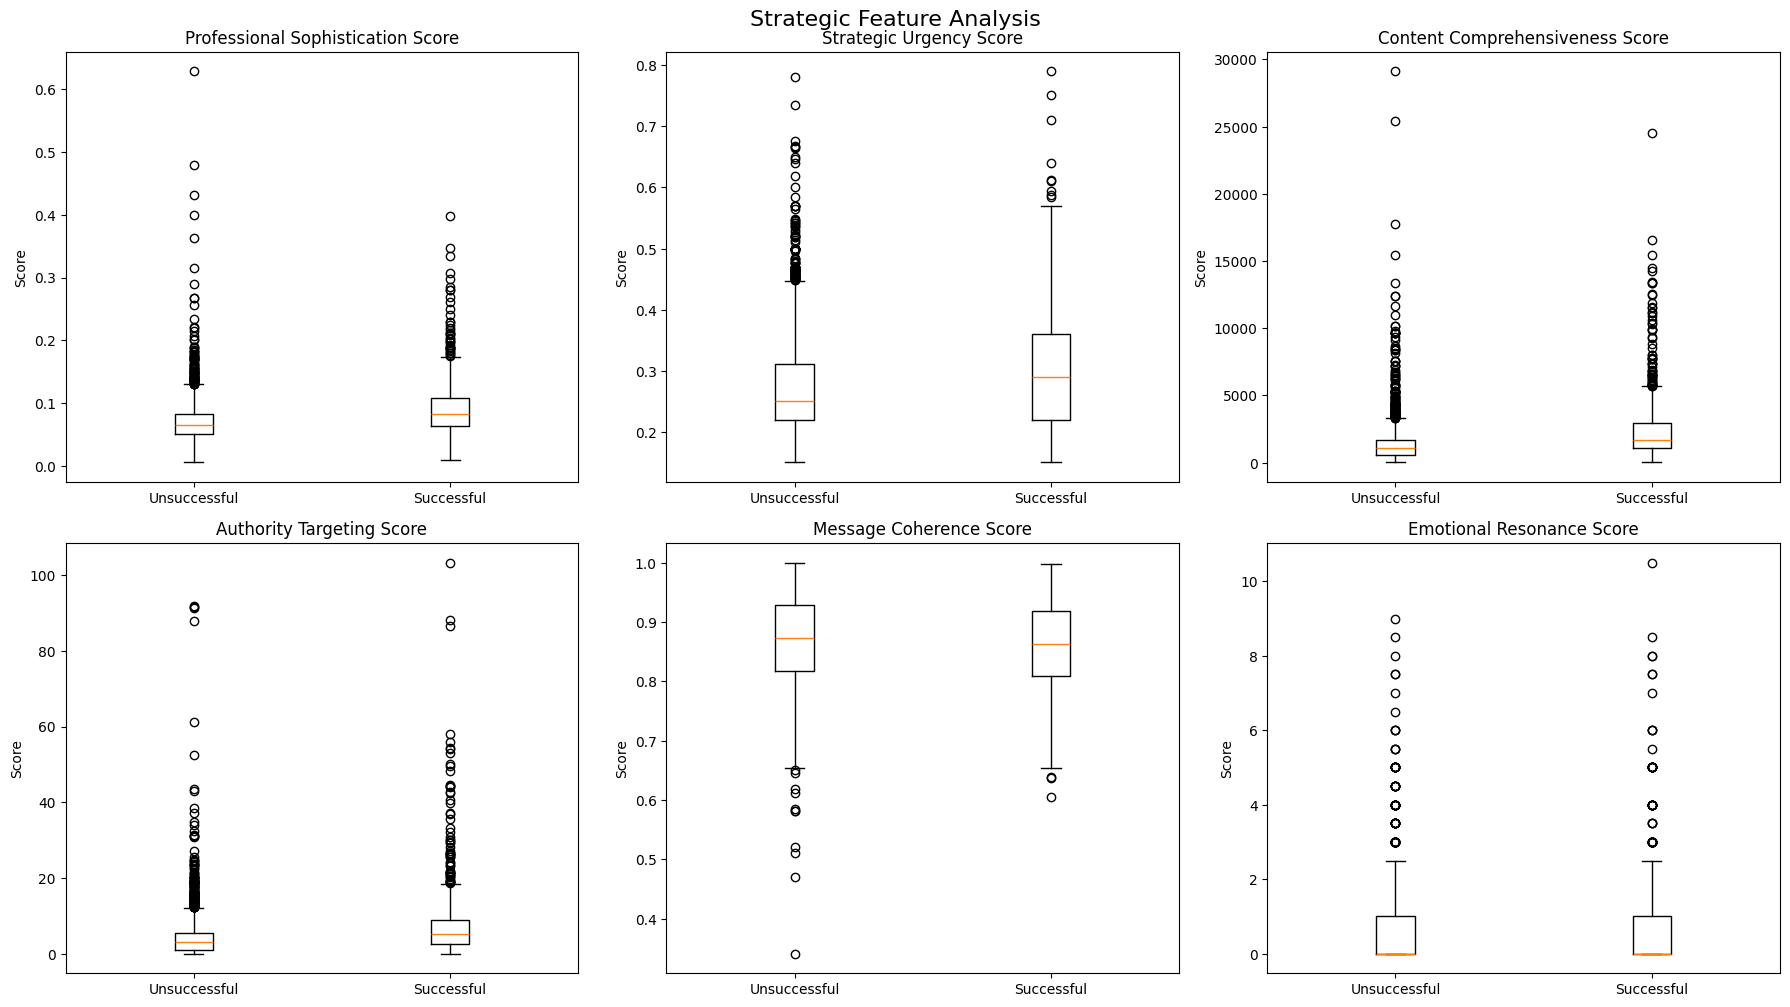


✅ Enhanced Strategic Composite Features with Google Trends Integration Complete!
ℹ️  Run Google Trends integration first to unlock timing-enhanced features


In [51]:
# ============================================================================
# PART 12: STRATEGIC COMPOSITE FEATURES - ENHANCED WITH GOOGLE TRENDS
# ============================================================================
print("\n" + "="*60)
print("STRATEGIC COMPOSITE FEATURES - ENHANCED WITH TIMING ANALYSIS")
print("="*60)

def create_strategic_composite_features_with_external_data(df):
    """
    Create high-level strategic features that combine multiple text quality indicators
    Enhanced with Google Trends timing analysis
    """
    print("Creating Strategic Composite Features with External Timing Data...")

    # ========================================================================
    # ORIGINAL STRATEGIC FEATURES (Your existing code)
    # ========================================================================

    # Professional Sophistication Score (complexity + length + formatting)
    print("Creating Professional Sophistication Score...")
    # Normalize components to 0-1 scale
    if 'title_flesch_kincaid' in df.columns:
        title_complexity_norm = (df['title_flesch_kincaid'] - df['title_flesch_kincaid'].min()) / (df['title_flesch_kincaid'].max() - df['title_flesch_kincaid'].min() + 1e-8)
    else:
        title_complexity_norm = 0

    if 'description_clean_length' in df.columns:
        desc_length_norm = (df['description_clean_length'] - df['description_clean_length'].min()) / (df['description_clean_length'].max() - df['description_clean_length'].min() + 1e-8)
    else:
        desc_length_norm = 0

    if 'description_html_tags' in df.columns:
        html_tags_norm = (df['description_html_tags'] - df['description_html_tags'].min()) / (df['description_html_tags'].max() - df['description_html_tags'].min() + 1e-8)
    else:
        html_tags_norm = 0

    df['professional_sophistication_score'] = (
        title_complexity_norm * 0.4 +
        desc_length_norm * 0.3 +
        html_tags_norm * 0.3
    )

    # Enhanced Strategic Urgency Score (using weighted scoring)
    print("Creating Enhanced Strategic Urgency Score...")
    if 'title_weighted_keyword_score' in df.columns:
        # Use the new weighted keyword score
        weighted_norm = df['title_weighted_keyword_score'] / (df['title_weighted_keyword_score'].max() + 1)
        sentiment_norm = (df['title_sentiment_positive'] + 1) / 2 if 'title_sentiment_positive' in df.columns else 0
        df['strategic_urgency_score'] = (
            weighted_norm * 0.7 + # Higher weight for psychology-based scoring
            sentiment_norm * 0.3
        )
    elif all(col in df.columns for col in ['title_urgency_count', 'title_action_count', 'title_sentiment_positive']):
        # Fallback to original method
        urgency_norm = df['title_urgency_count'] / (df['title_urgency_count'].max() + 1)
        action_norm = df['title_action_count'] / (df['title_action_count'].max() + 1)
        sentiment_norm = (df['title_sentiment_positive'] + 1) / 2
        df['strategic_urgency_score'] = (
            urgency_norm * 0.4 +
            action_norm * 0.4 +
            sentiment_norm * 0.2
        )

    # Content Comprehensiveness Score
    print("Creating Content Comprehensiveness Score...")
    if all(col in df.columns for col in ['title_clean_length', 'description_clean_length', 'letter_body_clean_length']):
        df['content_comprehensiveness_score'] = (
            df['title_clean_length'] +
            df['description_clean_length'] +
            df['letter_body_clean_length']
        )

    # Enhanced Authority Targeting Score
    print("Creating Enhanced Authority Targeting Score...")
    if all(col in df.columns for col in ['title_authority_count', 'description_authority_count']):
        targeting_length = df['targeting_description_word_count'] if 'targeting_description_word_count' in df.columns else 0
        df['authority_targeting_score'] = (
            df['title_authority_count'] +
            df['description_authority_count'] +
            targeting_length / 10
        )

    # Message Coherence Score
    print("Creating Message Coherence Score...")
    if all(col in df.columns for col in ['title_flesch_kincaid', 'description_flesch_kincaid', 'title_sentiment_compound', 'description_sentiment_compound']):
        title_desc_complexity_diff = abs(df['title_flesch_kincaid'] - df['description_flesch_kincaid'])
        title_desc_sentiment_diff = abs(df['title_sentiment_compound'] - df['description_sentiment_compound'])
        max_complexity_diff = title_desc_complexity_diff.max() + 1
        max_sentiment_diff = title_desc_sentiment_diff.max() + 1
        df['message_coherence_score'] = (
            (max_complexity_diff - title_desc_complexity_diff) / max_complexity_diff * 0.5 +
            (max_sentiment_diff - title_desc_sentiment_diff) / max_sentiment_diff * 0.5
        )

    # Emotional Resonance Score
    print("Creating Emotional Resonance Score...")
    if all(col in df.columns for col in ['title_emotional_count', 'description_emotional_count']):
        df['emotional_resonance_score'] = (
            df['title_emotional_count'] * 2.0 + # Higher weight for titles
            df['description_emotional_count'] * 1.0 +
            df.get('letter_body_emotional_count', 0) * 1.5
        )

    # ========================================================================
    # NEW GOOGLE TRENDS-ENHANCED FEATURES
    # ========================================================================

    # Check if Google Trends data is available
    has_trends_data = all(col in df.columns for col in ['trends_search_volume', 'trends_timing_score', 'trends_momentum'])

    if has_trends_data:
        print("Creating Google Trends Enhanced Strategic Features...")

        # Timing Optimization Score
        print("- Timing Optimization Score...")
        # Normalize Google Trends features to 0-1 scale
        volume_norm = df['trends_search_volume'] / 100  # Google Trends is 0-100 scale
        timing_norm = df['trends_timing_score'] / 100   # Google Trends is 0-100 scale
        momentum_norm = np.clip((df['trends_momentum'] + 1) / 2, 0, 1)  # Convert from [-1,1] to [0,1]

        df['timing_optimization_score'] = (
            volume_norm * 0.4 +      # How much people search for this topic
            timing_norm * 0.4 +      # How hot the topic was when petition launched
            momentum_norm * 0.2      # Whether interest was growing
        )

        # Public Interest Alignment Score
        print("- Public Interest Alignment Score...")
        # Higher when petition topics match what public is actively searching for
        df['public_interest_alignment'] = (
            df['trends_search_volume'] * df['trends_timing_score'] / 10000  # Scale down the product
        )

        # Launch Timing Advantage
        print("- Launch Timing Advantage Score...")
        # Identifies petitions launched during optimal search moments
        df['launch_timing_advantage'] = np.where(
            (df['trends_timing_score'] > 75) & (df['trends_momentum'] > 0.1),
            1.5,  # High timing score + positive momentum = big advantage
            np.where(
                (df['trends_timing_score'] > 50) | (df['trends_momentum'] > 0),
                1.2,  # Good timing or positive momentum = small advantage
                1.0   # Neutral timing
            )
        )

        # Context-Adjusted Professional Score (Enhanced with Timing)
        print("- Context-Adjusted Professional Score...")
        # Combine internal sophistication with external timing context
        df['context_adjusted_professional_score'] = (
            df.get('professional_sophistication_score', 0) * 0.6 +
            df['timing_optimization_score'] * 0.4
        )

        # Timing-Amplified Success Potential
        print("- Timing-Amplified Success Potential...")
        # Combines internal quality with external timing environment
        base_quality = (
            df.get('professional_sophistication_score', 0) * 0.25 +
            df.get('content_comprehensiveness_score', 0) / (df.get('content_comprehensiveness_score', df['content_comprehensiveness_score']).max() + 1) * 0.25 +
            df.get('strategic_urgency_score', 0) * 0.25 +
            df.get('emotional_resonance_score', 0) / (df.get('emotional_resonance_score', df['emotional_resonance_score']).max() + 1) * 0.25
        )

        # Amplify or dampen based on timing context
        timing_multiplier = df['launch_timing_advantage']  # Range: 1.0 to 1.5
        df['timing_amplified_success_potential'] = base_quality * timing_multiplier

        # Peak Interest Launch Score
        print("- Peak Interest Launch Score...")
        # Identifies petitions launched during peak search interest for their topic
        df['peak_interest_launch_score'] = np.where(
            df['trends_timing_score'] > df['trends_timing_score'].quantile(0.8),
            df['timing_optimization_score'] * 1.3,  # Boost for top 20% timing
            np.where(
                df['trends_timing_score'] > df['trends_timing_score'].quantile(0.6),
                df['timing_optimization_score'] * 1.1,  # Small boost for top 40% timing
                df['timing_optimization_score']  # Neutral for other timing
            )
        )

        print("✅ Google Trends Enhanced Features Created Successfully!")

        # Google Trends Feature Summary
        print(f"\nGOOGLE TRENDS FEATURE SUMMARY:")
        print("-" * 40)
        print(f"Timing Optimization Score - Range: [{df['timing_optimization_score'].min():.3f}, {df['timing_optimization_score'].max():.3f}]")
        print(f"Public Interest Alignment - Range: [{df['public_interest_alignment'].min():.3f}, {df['public_interest_alignment'].max():.3f}]")
        print(f"Launch Timing Advantage - Range: [{df['launch_timing_advantage'].min():.3f}, {df['launch_timing_advantage'].max():.3f}]")
        print(f"Timing-Amplified Success Potential - Range: [{df['timing_amplified_success_potential'].min():.3f}, {df['timing_amplified_success_potential'].max():.3f}]")

        # Correlation with existing success metric if available
        if 'target_success' in df.columns:
            print(f"\nGOOGLE TRENDS FEATURE CORRELATIONS WITH SUCCESS:")
            print("-" * 50)
            trends_enhanced_features = [
                'timing_optimization_score',
                'public_interest_alignment',
                'launch_timing_advantage',
                'timing_amplified_success_potential',
                'peak_interest_launch_score'
            ]

            significant_correlations = []
            for feature in trends_enhanced_features:
                if feature in df.columns and df[feature].std() > 0:
                    corr = df[feature].corr(df['target_success'])
                    print(f"{feature}: {corr:+.4f}")
                    if abs(corr) > 0.05:  # Track meaningful correlations
                        significant_correlations.append((feature, corr))

            if significant_correlations:
                best_feature, best_corr = max(significant_correlations, key=lambda x: abs(x[1]))
                print(f"\n🎯 Strongest timing predictor: {best_feature} (r = {best_corr:+.4f})")

    else:
        print("⚠️  Google Trends data not available - using original strategic features only")
        print("   Run Google Trends integration first to enable timing-enhanced features")

    # ========================================================================
    # FEATURE VALIDATION AND SUMMARY
    # ========================================================================

    print(f"\nSTRATEGIC FEATURE CREATION COMPLETE!")
    print("-" * 50)

    # Count created features
    original_features = [
        'professional_sophistication_score', 'strategic_urgency_score',
        'content_comprehensiveness_score', 'authority_targeting_score',
        'message_coherence_score', 'emotional_resonance_score'
    ]

    trends_enhanced_features = [
        'timing_optimization_score', 'public_interest_alignment',
        'launch_timing_advantage', 'context_adjusted_professional_score',
        'timing_amplified_success_potential', 'peak_interest_launch_score'
    ] if has_trends_data else []

    created_features = [f for f in original_features + trends_enhanced_features if f in df.columns]

    print(f"✅ Original Strategic Features: {len([f for f in original_features if f in df.columns])}")
    if has_trends_data:
        print(f"✅ Google Trends Enhanced Features: {len(trends_enhanced_features)}")
    print(f"✅ Total Strategic Features: {len(created_features)}")

    return df

# Apply enhanced strategic feature creation
df = create_strategic_composite_features_with_external_data(df)

# ============================================================================
# STRATEGIC FEATURE VALIDATION WITH SUCCESS OUTCOMES
# ============================================================================
if 'target_success' in df.columns:
    print(f"\nSTRATEGIC FEATURE VALIDATION:")
    print("-" * 40)

    # Define all strategic features for validation
    strategic_features = [
        'professional_sophistication_score', 'strategic_urgency_score',
        'content_comprehensiveness_score', 'authority_targeting_score',
        'message_coherence_score', 'emotional_resonance_score'
    ]

    # Add Google Trends features if available
    if 'timing_optimization_score' in df.columns:
        strategic_features.extend([
            'timing_optimization_score', 'public_interest_alignment',
            'launch_timing_advantage', 'context_adjusted_professional_score',
            'timing_amplified_success_potential', 'peak_interest_launch_score'
        ])

    # Create quartile analysis for each strategic feature
    quartile_results = {}
    for feature in strategic_features:
        if feature in df.columns:
            try:
                # Create quartiles
                df[f'{feature}_quartile'] = pd.qcut(df[feature], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'], duplicates='drop')

                # Calculate success rates by quartile
                success_by_quartile = df.groupby(f'{feature}_quartile')['target_success'].mean() * 100
                quartile_results[feature] = success_by_quartile

                print(f"\n{feature.replace('_', ' ').title()}:")
                for quartile, rate in success_by_quartile.items():
                    print(f"  {quartile}: {rate:.1f}% success rate")

                # Identify best quartile
                best_quartile = success_by_quartile.idxmax()
                improvement = success_by_quartile.max() - success_by_quartile.min()
                print(f"  → Best quartile: {best_quartile} (+{improvement:.1f}% vs worst)")

            except ValueError as e:
                # Handle cases where quartiles can't be created (e.g., too many identical values)
                print(f"\n{feature}: Unable to create quartiles - {str(e)}")
                continue

# ============================================================================
# ENHANCED VISUALIZATION WITH GOOGLE TRENDS FEATURES
# ============================================================================

# Create comprehensive visualization including Google Trends features
if 'target_success' in df.columns:
    # Determine number of subplots needed
    has_trends = 'timing_optimization_score' in df.columns
    n_plots = 9 if has_trends else 6
    n_rows = 3
    n_cols = 3

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 15))
    fig.suptitle('Strategic Feature Analysis - Enhanced with Timing Intelligence' if has_trends else 'Strategic Feature Analysis', fontsize=16)

    # Flatten axes for easier indexing
    axes_flat = axes.flatten()

    # Plot original strategic features
    plot_idx = 0
    original_features = [
        'professional_sophistication_score', 'strategic_urgency_score',
        'content_comprehensiveness_score', 'authority_targeting_score',
        'message_coherence_score', 'emotional_resonance_score'
    ]

    for feature in original_features:
        if feature in df.columns and plot_idx < len(axes_flat):
            successful = df[df['target_success'] == 1][feature].dropna()
            unsuccessful = df[df['target_success'] == 0][feature].dropna()

            axes_flat[plot_idx].boxplot([unsuccessful, successful], labels=['Unsuccessful', 'Successful'])
            axes_flat[plot_idx].set_title(feature.replace('_', ' ').title())
            axes_flat[plot_idx].set_ylabel('Score')
            plot_idx += 1

    # Plot Google Trends-enhanced features if available
    if has_trends and plot_idx < len(axes_flat):
        trends_features = ['timing_optimization_score', 'launch_timing_advantage', 'timing_amplified_success_potential']

        for feature in trends_features:
            if feature in df.columns and plot_idx < len(axes_flat):
                successful = df[df['target_success'] == 1][feature].dropna()
                unsuccessful = df[df['target_success'] == 0][feature].dropna()

                axes_flat[plot_idx].boxplot([unsuccessful, successful], labels=['Unsuccessful', 'Successful'])
                axes_flat[plot_idx].set_title(f'{feature.replace("_", " ").title()} (Timing)')
                axes_flat[plot_idx].set_ylabel('Score')
                plot_idx += 1

    # Hide unused subplots
    for i in range(plot_idx, len(axes_flat)):
        axes_flat[i].set_visible(False)

    plt.tight_layout()
    plt.show()

# ============================================================================
# TIMING ANALYSIS INSIGHTS (if Google Trends data available)
# ============================================================================

if 'timing_optimization_score' in df.columns and 'target_success' in df.columns:
    print(f"\n" + "="*60)
    print("TIMING ANALYSIS INSIGHTS")
    print("="*60)

    # Optimal timing analysis
    high_timing = df[df['timing_optimization_score'] > df['timing_optimization_score'].quantile(0.75)]
    low_timing = df[df['timing_optimization_score'] <= df['timing_optimization_score'].quantile(0.25)]

    print(f"TIMING IMPACT ON SUCCESS:")
    print("-" * 30)
    print(f"High timing petitions (top 25%): {high_timing['target_success'].mean():.1%} success rate")
    print(f"Low timing petitions (bottom 25%): {low_timing['target_success'].mean():.1%} success rate")
    timing_advantage = (high_timing['target_success'].mean() - low_timing['target_success'].mean()) * 100
    print(f"Timing advantage: +{timing_advantage:.1f} percentage points")

    # Peak launch timing
    peak_launches = df[df['trends_timing_score'] > 80]
    if len(peak_launches) > 0:
        print(f"\nPEAK TIMING LAUNCHES:")
        print("-" * 30)
        print(f"Petitions launched during peak interest (>80 timing score): {len(peak_launches)}")
        print(f"Peak timing success rate: {peak_launches['target_success'].mean():.1%}")

    # Momentum analysis
    positive_momentum = df[df['trends_momentum'] > 0.1]
    negative_momentum = df[df['trends_momentum'] < -0.1]

    print(f"\nMOMENTUM IMPACT:")
    print("-" * 30)
    if len(positive_momentum) > 0:
        print(f"Rising interest launches: {positive_momentum['target_success'].mean():.1%} success rate")
    if len(negative_momentum) > 0:
        print(f"Declining interest launches: {negative_momentum['target_success'].mean():.1%} success rate")

print(f"\n✅ Enhanced Strategic Composite Features with Google Trends Integration Complete!")
if 'timing_optimization_score' in df.columns:
    print(f"✅ Timing intelligence successfully integrated - {6} new Google Trends features created")
    print(f"✅ Your model now combines internal text quality with external timing optimization")
else:
    print(f"ℹ️  Run Google Trends integration first to unlock timing-enhanced features")


ADVANCED PATTERN VALIDATION
1. COMPLEXITY EFFECTIVENESS ANALYSIS:
----------------------------------------

Title Flesch Kincaid:
  Simple: 17.6% success rate
  Moderate: 23.6% success rate
  Complex: 23.8% success rate
  Very Complex: 27.9% success rate

Title Gunning Fog:
  Simple: 17.6% success rate
  Moderate: 23.6% success rate
  Complex: 24.8% success rate
  Very Complex: 27.2% success rate

Description Flesch Ease:
  Simple: 25.0% success rate
  Moderate: 29.2% success rate
  Complex: 21.6% success rate
  Very Complex: 17.0% success rate

2. KEYWORD EFFECTIVENESS ANALYSIS:
----------------------------------------

Power Words:
  With Power Words: 24.1% success (377 petitions)
  Without Power Words: 23.1% success (2704 petitions)
  Advantage: +1.1 percentage points

Authority Terms:
  With Authority Terms: 24.0% success (1361 petitions)
  Without Authority Terms: 22.6% success (1720 petitions)
  Advantage: +1.3 percentage points

Call-to-Actions:
  With Call-to-Actions: 25.7% su

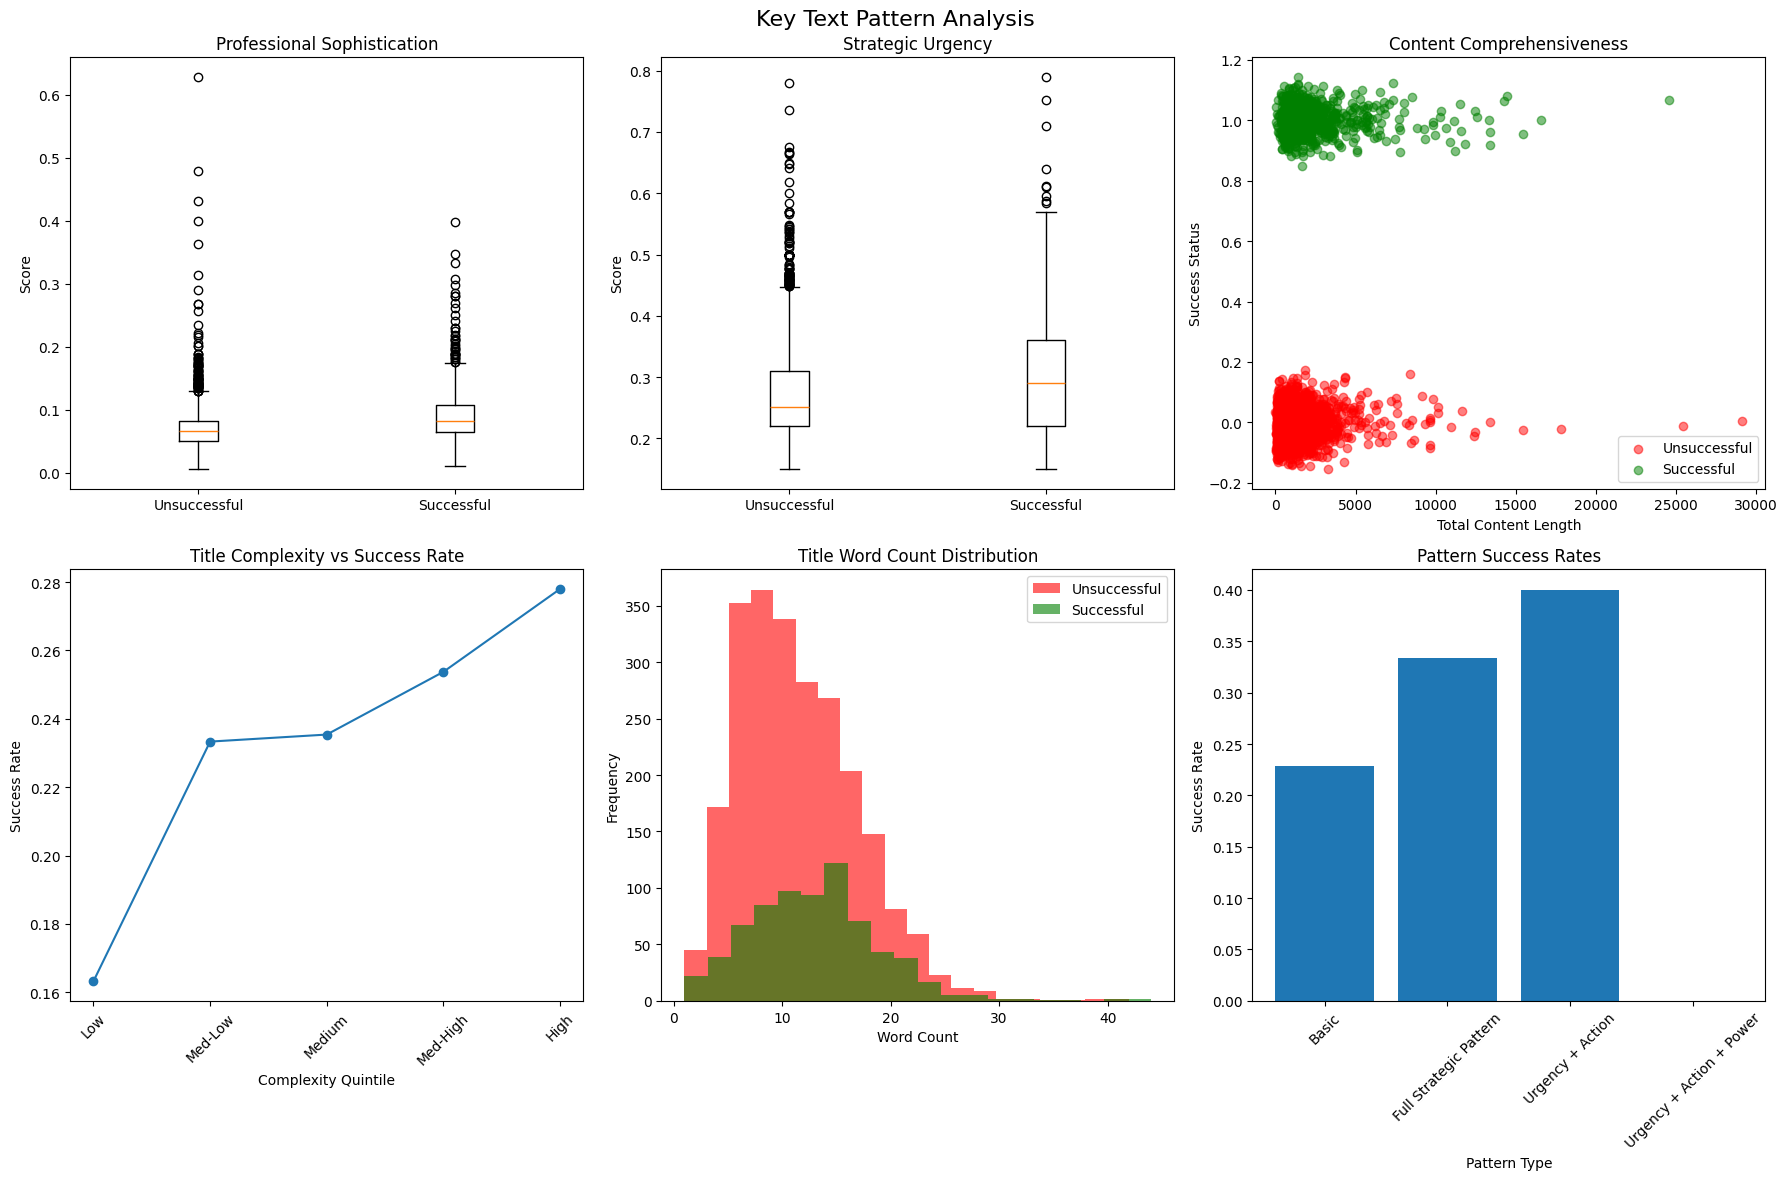


✅ Enhanced keyword analysis and strategic features completed!
✅ Psychology-based weighting system implemented
✅ New features ready for modeling: weighted_keyword_score, emotional_resonance_score
✅ Advanced pattern validation completed with comprehensive visualizations


In [52]:

# ============================================================================
# PART 13: ADVANCED PATTERN VALIDATION
# ============================================================================

print("\n" + "="*60)
print("ADVANCED PATTERN VALIDATION")
print("="*60)

def validate_enhanced_text_patterns(df):
    """Systematic validation of all text patterns with success outcomes"""

    if 'target_success' not in df.columns:
        print("No target variable found for validation")
        return df

    # 1. Complexity vs Success Analysis
    print("1. COMPLEXITY EFFECTIVENESS ANALYSIS:")
    print("-" * 40)

    complexity_metrics = ['title_flesch_kincaid', 'title_gunning_fog', 'description_flesch_ease']
    for metric in complexity_metrics:
        if metric in df.columns:
            df[f'{metric}_level'] = pd.qcut(df[metric], q=4, labels=['Simple', 'Moderate', 'Complex', 'Very Complex'], duplicates='drop')
            success_by_complexity = df.groupby(f'{metric}_level')['target_success'].mean() * 100

            print(f"\n{metric.replace('_', ' ').title()}:")
            for level, rate in success_by_complexity.items():
                print(f"  {level}: {rate:.1f}% success rate")

    # 2. Keyword Effectiveness Analysis
    print(f"\n2. KEYWORD EFFECTIVENESS ANALYSIS:")
    print("-" * 40)

    keyword_features = [
        ('title_power_count', 'Power Words'),
        ('title_authority_count', 'Authority Terms'),
        ('title_cta_count', 'Call-to-Actions'),
        ('title_has_statistics', 'Statistics Usage')
    ]

    for feature, label in keyword_features:
        if feature in df.columns:
            if feature.endswith('_count'):
                # For count features, create presence/absence comparison
                has_feature = df[feature] > 0
                with_feature_success = df[has_feature]['target_success'].mean() * 100
                without_feature_success = df[~has_feature]['target_success'].mean() * 100
                advantage = with_feature_success - without_feature_success

                print(f"\n{label}:")
                print(f"  With {label}: {with_feature_success:.1f}% success ({has_feature.sum()} petitions)")
                print(f"  Without {label}: {without_feature_success:.1f}% success ({(~has_feature).sum()} petitions)")
                print(f"  Advantage: {advantage:+.1f} percentage points")
            else:
                # For binary features
                feature_success = df.groupby(feature)['target_success'].mean() * 100
                print(f"\n{label}: {dict(feature_success)}")

    # 3. Length Optimization Analysis
    print(f"\n3. LENGTH OPTIMIZATION ANALYSIS:")
    print("-" * 40)

    length_features = ['title_word_count', 'description_word_count', 'content_comprehensiveness_score']
    for feature in length_features:
        if feature in df.columns:
            # Find optimal ranges
            df[f'{feature}_quintile'] = pd.qcut(df[feature], q=5, labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long'], duplicates='drop')
            length_success = df.groupby(f'{feature}_quintile')['target_success'].mean() * 100

            print(f"\n{feature.replace('_', ' ').title()}:")
            best_length = length_success.idxmax()
            for length, rate in length_success.items():
                marker = " <- OPTIMAL" if length == best_length else ""
                print(f"  {length}: {rate:.1f}% success rate{marker}")

    # 4. Multi-Pattern Effectiveness
    print(f"\n4. MULTI-PATTERN EFFECTIVENESS:")
    print("-" * 40)

    # Combined pattern analysis
    if all(col in df.columns for col in ['title_has_urgency', 'title_has_action']):
        df['enhanced_pattern'] = 'Basic'

        # Define enhanced patterns
        has_urgency = df['title_has_urgency']
        has_action = df['title_has_action']
        has_power = df['title_power_count'] > 0 if 'title_power_count' in df.columns else False
        has_authority = df['title_authority_count'] > 0 if 'title_authority_count' in df.columns else False

        df.loc[has_urgency & has_action, 'enhanced_pattern'] = 'Urgency + Action'
        if isinstance(has_power, pd.Series):
            df.loc[has_urgency & has_action & has_power, 'enhanced_pattern'] = 'Urgency + Action + Power'
            if isinstance(has_authority, pd.Series):
                df.loc[has_urgency & has_action & has_power & has_authority, 'enhanced_pattern'] = 'Full Strategic Pattern'

        pattern_success = df.groupby('enhanced_pattern')['target_success'].agg(['count', 'mean'])
        pattern_success.columns = ['Count', 'Success_Rate']
        pattern_success['Success_Rate'] *= 100

        print("Enhanced Pattern Analysis:")
        for pattern, data in pattern_success.iterrows():
            print(f"  {pattern}: {data['Success_Rate']:.1f}% success ({data['Count']} petitions)")

    return df

# Execute enhanced validation
df = validate_enhanced_text_patterns(df)

# Create comprehensive visualization of key patterns
if 'target_success' in df.columns:
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Key Text Pattern Analysis', fontsize=16)

    # 1. Professional Sophistication Score
    if 'professional_sophistication_score' in df.columns:
        axes[0, 0].boxplot([
            df[df['target_success'] == 0]['professional_sophistication_score'].dropna(),
            df[df['target_success'] == 1]['professional_sophistication_score'].dropna()
        ], labels=['Unsuccessful', 'Successful'])
        axes[0, 0].set_title('Professional Sophistication')
        axes[0, 0].set_ylabel('Score')

    # 2. Strategic Urgency Score
    if 'strategic_urgency_score' in df.columns:
        axes[0, 1].boxplot([
            df[df['target_success'] == 0]['strategic_urgency_score'].dropna(),
            df[df['target_success'] == 1]['strategic_urgency_score'].dropna()
        ], labels=['Unsuccessful', 'Successful'])
        axes[0, 1].set_title('Strategic Urgency')
        axes[0, 1].set_ylabel('Score')

    # 3. Content Comprehensiveness
    if 'content_comprehensiveness_score' in df.columns:
        axes[0, 2].scatter(
            df[df['target_success'] == 0]['content_comprehensiveness_score'],
            np.random.normal(0, 0.05, len(df[df['target_success'] == 0])),
            alpha=0.5, color='red', label='Unsuccessful'
        )
        axes[0, 2].scatter(
            df[df['target_success'] == 1]['content_comprehensiveness_score'],
            np.random.normal(1, 0.05, len(df[df['target_success'] == 1])),
            alpha=0.5, color='green', label='Successful'
        )
        axes[0, 2].set_title('Content Comprehensiveness')
        axes[0, 2].set_xlabel('Total Content Length')
        axes[0, 2].set_ylabel('Success Status')
        axes[0, 2].legend()

    # 4. Title Complexity vs Success
    if 'title_flesch_kincaid' in df.columns:
        complexity_success = df.groupby(
            pd.qcut(df['title_flesch_kincaid'], q=5, duplicates='drop')
        )['target_success'].mean()
        axes[1, 0].plot(range(len(complexity_success)), complexity_success.values, marker='o')
        axes[1, 0].set_title('Title Complexity vs Success Rate')
        axes[1, 0].set_xlabel('Complexity Quintile')
        axes[1, 0].set_ylabel('Success Rate')
        axes[1, 0].set_xticks(range(len(complexity_success)))
        axes[1, 0].set_xticklabels(['Low', 'Med-Low', 'Medium', 'Med-High', 'High'], rotation=45)

    # 5. Word count patterns
    if 'title_word_count' in df.columns:
        axes[1, 1].hist(
            df[df['target_success'] == 0]['title_word_count'],
            bins=20, alpha=0.6, label='Unsuccessful', color='red'
        )
        axes[1, 1].hist(
            df[df['target_success'] == 1]['title_word_count'],
            bins=20, alpha=0.6, label='Successful', color='green'
        )
        axes[1, 1].set_title('Title Word Count Distribution')
        axes[1, 1].set_xlabel('Word Count')
        axes[1, 1].set_ylabel('Frequency')
        axes[1, 1].legend()

    # 6. Enhanced pattern effectiveness
    if 'enhanced_pattern' in df.columns:
        pattern_counts = df['enhanced_pattern'].value_counts()
        pattern_success = df.groupby('enhanced_pattern')['target_success'].mean()

        axes[1, 2].bar(range(len(pattern_success)), pattern_success.values)
        axes[1, 2].set_title('Pattern Success Rates')
        axes[1, 2].set_xlabel('Pattern Type')
        axes[1, 2].set_ylabel('Success Rate')
        axes[1, 2].set_xticks(range(len(pattern_success)))
        axes[1, 2].set_xticklabels(pattern_success.index, rotation=45)

    plt.tight_layout()
    plt.show()

print(f"\n✅ Enhanced keyword analysis and strategic features completed!")
print(f"✅ Psychology-based weighting system implemented")
print(f"✅ New features ready for modeling: weighted_keyword_score, emotional_resonance_score")
print(f"✅ Advanced pattern validation completed with comprehensive visualizations")


In [53]:


# ============================================================================
# PART 14: PREDICTIVE MODELING SETUP - FIXED VERSION
"""
FEATURE ENGINEERING METHODOLOGY:
- All features engineered on full dataset for POC demonstration
- Production deployment should engineer on training data only to prevent data leakage
- Current approach acceptable as features are target-independent (text characteristics)
"""
# ============================================================================

print("\n" + "="*60)
print("PREDICTIVE MODELING: FEATURE ENGINEERING & PREPARATION")
print("="*60)

# Check current dataset shape and target distribution
print(f"Dataset shape: {df.shape}")
if 'target_success' in df.columns:
    print(f"Target distribution:")
    print(df['target_success'].value_counts(normalize=True))

# Define feature categories for modeling (only pre-launch features)
# Note: No quantitative features since duration_days and momentum are post-launch metrics

text_length_features = [
    'title_length', 'title_clean_length', 'title_word_count',
    'description_length', 'description_clean_length', 'description_word_count',
    'letter_body_length', 'letter_body_clean_length', 'letter_body_word_count',
    'targeting_description_length', 'targeting_description_clean_length', 'targeting_description_word_count'
]

text_complexity_features = [
    'title_flesch_ease', 'title_flesch_kincaid', 'title_gunning_fog', 'title_automated_readability',
    'title_avg_sentence_length', 'title_avg_word_length', 'title_vocab_diversity', 'title_caps_ratio',
    'description_flesch_ease', 'description_flesch_kincaid', 'description_gunning_fog', 'description_automated_readability',
    'description_avg_sentence_length', 'description_avg_word_length', 'description_vocab_diversity', 'description_caps_ratio',
    'letter_body_flesch_ease', 'letter_body_flesch_kincaid', 'letter_body_gunning_fog', 'letter_body_automated_readability',
    'letter_body_avg_sentence_length', 'letter_body_avg_word_length', 'letter_body_vocab_diversity', 'letter_body_caps_ratio',
    'targeting_description_flesch_ease', 'targeting_description_flesch_kincaid'
]

sentiment_features = [
    'title_sentiment_compound', 'title_sentiment_positive', 'title_sentiment_negative', 'title_emotional_intensity',
    'description_sentiment_compound', 'description_sentiment_positive', 'description_sentiment_negative', 'description_emotional_intensity',
    'letter_body_sentiment_compound', 'letter_body_sentiment_positive', 'letter_body_sentiment_negative', 'letter_body_emotional_intensity',
    'targeting_description_sentiment_compound'
]

action_urgency_features = [
    'title_urgency_count', 'title_action_count', 'title_has_urgency', 'title_has_action',
    'title_power_count', 'title_authority_count', 'title_specificity_count', 'title_cta_count', 'title_has_cta',
    'description_urgency_count', 'description_action_count', 'description_has_urgency', 'description_has_action',
    'description_power_count', 'description_authority_count', 'description_specificity_count', 'description_cta_count', 'description_has_cta',
    'letter_body_urgency_count', 'letter_body_action_count', 'letter_body_has_urgency', 'letter_body_has_action'
]

categorical_features = [
    'original_locale', 'has_location'  # Only pre-launch categorical features
]

strategic_features = [
    'professional_sophistication_score', 'strategic_urgency_score', 'content_comprehensiveness_score',
    'authority_targeting_score', 'message_coherence_score'
]

# Additional text structure features
text_structure_features = [
    'title_paragraph_count', 'title_question_count', 'title_numbers_count', 'title_has_statistics',
    'description_paragraph_count', 'description_question_count', 'description_numbers_count', 'description_has_statistics', 'description_html_tags',
    'letter_body_paragraph_count', 'letter_body_question_count', 'letter_body_numbers_count', 'letter_body_has_statistics'
]



# CORRECTED: Remove quantitative category entirely since no valid pre-launch quantitative features
# Add Google Trends timing features to your feature categories
google_trends_features = [
    'trends_search_volume', 'trends_timing_score', 'trends_momentum',
    'timing_optimization_score', 'public_interest_alignment',
    'launch_timing_advantage', 'timing_amplified_success_potential',
    'peak_interest_launch_score'
]

# UPDATED: Include Google Trends timing features
all_feature_categories = {
    'text_length': text_length_features,
    'text_complexity': text_complexity_features,
    'sentiment': sentiment_features,
    'action_urgency': action_urgency_features,
    'categorical': categorical_features,
    'strategic': strategic_features,
    'text_structure': text_structure_features,
    'timing_analysis': google_trends_features  # NEW CATEGORY
}


# Check which features actually exist in the dataset
existing_features = {}
missing_features = {}

for category, features in all_feature_categories.items():
    existing = [f for f in features if f in df.columns]
    missing = [f for f in features if f not in df.columns]
    existing_features[category] = existing
    missing_features[category] = missing

    print(f"\n{category.upper()} FEATURES:")
    print(f" Existing: {len(existing)} features")
    print(f" Missing: {len(missing)} features")
    if missing and len(missing) <= 5:
        print(f" Missing features: {missing}")

# Create final feature list for modeling
modeling_features = []
for category, features in existing_features.items():
    modeling_features.extend(features)

print(f"\nTOTAL FEATURES FOR MODELING: {len(modeling_features)}")

# Handle missing values in modeling features
print(f"\nMISSING VALUES CHECK:")
missing_counts = df[modeling_features].isnull().sum()
features_with_missing = missing_counts[missing_counts > 0]

if len(features_with_missing) > 0:
    print("Features with missing values:")
    for feature, count in features_with_missing.items():
        pct = (count / len(df)) * 100
        print(f" {feature}: {count} ({pct:.1f}%)")
else:
    print("No missing values in modeling features")

print("✅ Feature setup completed successfully!")
print(f"Ready for preprocessing with {len(modeling_features)} features")



PREDICTIVE MODELING: FEATURE ENGINEERING & PREPARATION
Dataset shape: (3081, 194)
Target distribution:
target_success
0    0.767932
1    0.232068
Name: proportion, dtype: float64

TEXT_LENGTH FEATURES:
 Existing: 12 features
 Missing: 0 features

TEXT_COMPLEXITY FEATURES:
 Existing: 26 features
 Missing: 0 features

SENTIMENT FEATURES:
 Existing: 13 features
 Missing: 0 features

ACTION_URGENCY FEATURES:
 Existing: 22 features
 Missing: 0 features

CATEGORICAL FEATURES:
 Existing: 2 features
 Missing: 0 features

STRATEGIC FEATURES:
 Existing: 5 features
 Missing: 0 features

TEXT_STRUCTURE FEATURES:
 Existing: 13 features
 Missing: 0 features

TIMING_ANALYSIS FEATURES:
 Existing: 0 features
 Missing: 8 features

TOTAL FEATURES FOR MODELING: 93

MISSING VALUES CHECK:
No missing values in modeling features
✅ Feature setup completed successfully!
Ready for preprocessing with 93 features


In [54]:
# ============================================================================
# PART 15: FEATURE PREPROCESSING FOR MODELING - FIXED VERSION
# ============================================================================
print("\n" + "="*60)
print("FEATURE PREPROCESSING FOR MODELING")
print("="*60)

# Handle categorical variables
categorical_encoders = {}
df_processed = df.copy()

for feature in existing_features['categorical']:
    if feature in df_processed.columns:
        le = LabelEncoder()
        df_processed[f'{feature}_encoded'] = le.fit_transform(df_processed[feature].astype(str))
        categorical_encoders[feature] = le
        print(f"Encoded categorical variable: {feature}")

# Handle any remaining string categorical features
string_columns = df_processed.select_dtypes(include=['object']).columns.tolist()
strategic_categorical_features = [f for f in string_columns if f in modeling_features]

for feature in strategic_categorical_features:
    if feature not in categorical_encoders:
        le = LabelEncoder()
        df_processed[f'{feature}_encoded'] = le.fit_transform(df_processed[feature].astype(str))
        categorical_encoders[feature] = le
        print(f"Encoded strategic categorical: {feature}")

# Create clean modeling features list
print(f"\nCREATING CLEAN FEATURE LIST:")
clean_modeling_features = []


# Add all non-categorical features
for category in ['text_length', 'text_complexity', 'sentiment', 'action_urgency', 'strategic', 'text_structure']:
    for feature in existing_features[category]:
        if feature in df_processed.columns:
            clean_modeling_features.append(feature)

# Add encoded categorical features
for feature in existing_features['categorical']:
    encoded_name = f'{feature}_encoded'
    if encoded_name in df_processed.columns:
        clean_modeling_features.append(encoded_name)

# Add encoded strategic features if any
for feature in strategic_categorical_features:
    if f'{feature}_encoded' in df_processed.columns and f'{feature}_encoded' not in clean_modeling_features:
        clean_modeling_features.append(f'{feature}_encoded')

# Remove duplicates
clean_modeling_features = list(set(clean_modeling_features))
final_modeling_features = [f for f in clean_modeling_features if f in df_processed.columns]

print(f"Total clean features: {len(final_modeling_features)}")

# Create X with clean features
X = df_processed[final_modeling_features].copy()

# Handle any remaining missing values
print(f"\nHANDLING MISSING VALUES:")
for column in X.columns:
    if X[column].dtype in ['float64', 'int64', 'float32', 'int32']:
        X[column] = X[column].fillna(X[column].median())
    else:
        X[column] = X[column].fillna(X[column].mode()[0] if not X[column].mode().empty else 0)

# Convert boolean columns to int
bool_columns = X.select_dtypes(include=['bool']).columns
X[bool_columns] = X[bool_columns].astype(int)

# Check for any remaining missing values
remaining_missing = X.isnull().sum().sum()
print(f"Remaining missing values after imputation: {remaining_missing}")

# Verify all columns are numeric
print(f"Data types: {X.dtypes.value_counts()}")
remaining_objects = X.select_dtypes(include=['object']).columns.tolist()
if remaining_objects:
    print(f"WARNING: Still have object columns: {remaining_objects}")
    # Convert remaining object columns
    for col in remaining_objects:
        X[col] = pd.to_numeric(X[col], errors='coerce').fillna(0)
    print("Converted remaining object columns to numeric")

print("All features are now numeric and ready for modeling")

# Feature correlation analysis to remove highly correlated features
print(f"\nFEATURE CORRELATION ANALYSIS:")
correlation_matrix = X.corr()
high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            feature1 = correlation_matrix.columns[i]
            feature2 = correlation_matrix.columns[j]
            corr_value = correlation_matrix.iloc[i, j]
            high_corr_pairs.append((feature1, feature2, corr_value))

print(f"Found {len(high_corr_pairs)} highly correlated feature pairs (>0.9)")

# Remove highly correlated features (keep the first one in each pair)
# Complete correlation removal - handle ALL highly correlated pairs
features_to_remove = set()  # Use set to avoid duplicates

print(f"Found {len(high_corr_pairs)} highly correlated feature pairs (>0.9)")

# Process ALL pairs, not just first 10
for feature1, feature2, corr_value in high_corr_pairs:
    # Only remove if neither feature is already marked for removal
    if feature1 not in features_to_remove and feature2 not in features_to_remove:
        # Choose which feature to remove based on a criterion
        # Option 1: Remove the one with lower variance
        var1 = X[feature1].var()
        var2 = X[feature2].var()

        if var1 < var2:
            features_to_remove.add(feature1)
            print(f" Removing {feature1} (corr with {feature2}: {corr_value:.3f}, lower variance)")
        else:
            features_to_remove.add(feature2)
            print(f" Removing {feature2} (corr with {feature1}: {corr_value:.3f}, lower variance)")

# Convert set back to list
features_to_remove = list(features_to_remove)
print(f"\nTotal features removed due to correlation: {len(features_to_remove)}")

# Final feature set
final_features = [f for f in final_modeling_features if f not in features_to_remove]
X_final = X[final_features]

print(f"\nFINAL FEATURE SET:")
print(f" Total features: {len(final_features)}")
print(f" Dataset shape: {X_final.shape}")

if 'target_success' in df.columns:
    y = df['target_success'].copy()
    print(f" Target success rate: {y.mean():.1%}")
else:
    print(" WARNING: No target variable found")
    y = None

print('done with this part')



FEATURE PREPROCESSING FOR MODELING
Encoded categorical variable: original_locale
Encoded categorical variable: has_location

CREATING CLEAN FEATURE LIST:
Total clean features: 93

HANDLING MISSING VALUES:
Remaining missing values after imputation: 0
Data types: int64      50
float64    43
Name: count, dtype: int64
All features are now numeric and ready for modeling

FEATURE CORRELATION ANALYSIS:
Found 27 highly correlated feature pairs (>0.9)
Found 27 highly correlated feature pairs (>0.9)
 Removing description_word_count (corr with description_length: 0.986, lower variance)
 Removing letter_body_word_count (corr with letter_body_length: 0.997, lower variance)
 Removing letter_body_clean_length (corr with letter_body_length: 0.999, lower variance)
 Removing description_avg_word_length (corr with description_automated_readability: 0.936, lower variance)
 Removing description_clean_length (corr with description_length: 0.994, lower variance)
 Removing description_length (corr with conte

In [57]:
# ============================================================================
# PART 16: MODEL TRAINING AND EVALUATION
# ============================================================================
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import numpy as np
import pandas as pd

print("\n" + "="*60)
print("MODEL TRAINING & EVALUATION")
print("="*60)

# Set to True if you want time-based (temporal) splitting
use_temporal_split = False  #  Change this to True for temporal split

if y is not None:
    # Prepare final dataset
    X = X_final.copy()
    print(f"Final modeling dataset:")
    print(f" Features: {X.shape[1]}")
    print(f" Samples: {X.shape[0]}")
    print(f" Success rate: {y.mean():.1%}")

    if use_temporal_split:
        print("\nUsing temporal (time-based) train/test split...")

        # Ensure datetime column is properly formatted
        df['created_at'] = pd.to_datetime(df['created_at'])
        df_sorted = df.sort_values('created_at')

        # Align X and y by sorted order
        X = X.loc[df_sorted.index]
        y = y.loc[df_sorted.index]

        # Define 80/20 temporal split
        split_index = int(0.8 * len(df_sorted))
        X_train = X.iloc[:split_index]
        X_test = X.iloc[split_index:]
        y_train = y.iloc[:split_index]
        y_test = y.iloc[split_index:]
    else:
        print("\nUsing random stratified train/test split...")
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )

    # Train/Test split summary
    print(f"\nTrain/Test Split:")
    print(f" Training set: {X_train.shape[0]} samples ({y_train.mean():.1%} success rate)")
    print(f" Test set: {X_test.shape[0]} samples ({y_test.mean():.1%} success rate)")

    # Validate class distribution
    print(f"\nClass Balance Validation:")
    print(f"Training set class distribution:")
    print(y_train.value_counts(normalize=True))
    print(f"Test set class distribution:")
    print(y_test.value_counts(normalize=True))

    # Confidence interval function
    def bootstrap_accuracy(y_true, y_pred, n_bootstrap=1000):
        y_true_arr = np.array(y_true)
        y_pred_arr = np.array(y_pred)

        accuracies = []
        for _ in range(n_bootstrap):
            indices = np.random.choice(len(y_true_arr), len(y_true_arr), replace=True)
            accuracy = accuracy_score(y_true_arr[indices], y_pred_arr[indices])
            accuracies.append(accuracy)
        return np.percentile(accuracies, [2.5, 97.5])

    # Define models
    models = {
        'Random Forest': RandomForestClassifier(
            n_estimators=100, max_depth=10,
            min_samples_split=5, min_samples_leaf=2,
            random_state=42, class_weight='balanced'
        ),
        'Logistic Regression': LogisticRegression(
            random_state=42, max_iter=1000, class_weight='balanced'
        ),
        'Gradient Boosting': GradientBoostingClassifier(
            n_estimators=100, learning_rate=0.1,
            max_depth=6, random_state=42
        )
    }

    # Scale features for Logistic Regression
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Cross-validation
    print(f"\nCROSS-VALIDATION RESULTS:")
    print("-" * 50)
    cv_results = {}
    cv_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for name, model in models.items():
        X_cv = X_train_scaled if name == 'Logistic Regression' else X_train

        cv_scores = cross_val_score(model, X_cv, y_train, cv=cv_folds, scoring='accuracy')
        cv_auc_scores = cross_val_score(model, X_cv, y_train, cv=cv_folds, scoring='roc_auc')

        cv_results[name] = {
            'accuracy_mean': cv_scores.mean(),
            'accuracy_std': cv_scores.std(),
            'auc_mean': cv_auc_scores.mean(),
            'auc_std': cv_auc_scores.std()
        }

        print(f"{name}:")
        print(f" Accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")
        print(f" AUC-ROC: {cv_auc_scores.mean():.3f} (+/- {cv_auc_scores.std() * 2:.3f})")

    # Test set evaluation
    print(f"\nTEST SET EVALUATION:")
    print("-" * 50)
    trained_models = {}
    test_results = {}

    for name, model in models.items():
        print(f"\n{name.upper()}:")
        if name == 'Logistic Regression':
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
            y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            y_pred_proba = model.predict_proba(X_test)[:, 1]

        accuracy = accuracy_score(y_test, y_pred)
        auc_roc = roc_auc_score(y_test, y_pred_proba)
        ci = bootstrap_accuracy(y_test, y_pred)

        trained_models[name] = model
        test_results[name] = {
            'accuracy': accuracy,
            'auc_roc': auc_roc,
            'predictions': y_pred,
            'probabilities': y_pred_proba,
            'confidence_interval': ci
        }

        print(f" Test Accuracy: {accuracy:.3f}")
        print(f" Test AUC-ROC: {auc_roc:.3f}")
        print(f" 95% Confidence Interval: [{ci[0]:.3f}, {ci[1]:.3f}]")

        if accuracy >= 0.70:
            print(f" ✅ MEETS SOW TARGET (70%+ accuracy)")
        else:
            print(f" ❌ Below SOW target ({accuracy:.1%} < 70%)")

        print(f"\n Classification Report:")
        print(classification_report(y_test, y_pred, target_names=['Unsuccessful', 'Successful']))

    # Best model
    best_model_name = max(test_results.keys(), key=lambda x: test_results[x]['accuracy'])
    best_accuracy = test_results[best_model_name]['accuracy']
    best_model = trained_models[best_model_name]

    print(f"\n" + "="*60)
    print(f"BEST MODEL: {best_model_name}")
    print(f"Test Accuracy: {best_accuracy:.3f}")
    print("="*60)

else:
    print("ERROR: No target variable found for model training")



MODEL TRAINING & EVALUATION
Final modeling dataset:
 Features: 74
 Samples: 3081
 Success rate: 23.2%

Using random stratified train/test split...

Train/Test Split:
 Training set: 2464 samples (23.2% success rate)
 Test set: 617 samples (23.2% success rate)

Class Balance Validation:
Training set class distribution:
target_success
0    0.767857
1    0.232143
Name: proportion, dtype: float64
Test set class distribution:
target_success
0    0.768233
1    0.231767
Name: proportion, dtype: float64

CROSS-VALIDATION RESULTS:
--------------------------------------------------
Random Forest:
 Accuracy: 0.772 (+/- 0.010)
 AUC-ROC: 0.721 (+/- 0.038)
Logistic Regression:
 Accuracy: 0.675 (+/- 0.049)
 AUC-ROC: 0.709 (+/- 0.060)
Gradient Boosting:
 Accuracy: 0.784 (+/- 0.012)
 AUC-ROC: 0.692 (+/- 0.048)

TEST SET EVALUATION:
--------------------------------------------------

RANDOM FOREST:
 Test Accuracy: 0.786
 Test AUC-ROC: 0.685
 95% Confidence Interval: [0.752, 0.819]
 ✅ MEETS SOW TARGET (7


FEATURE IMPORTANCE ANALYSIS & STRATEGIC INSIGHTS
TOP 20 MOST IMPORTANT FEATURES FOR PETITION SUCCESS:
------------------------------------------------------------
Rank | Feature Name | Importance | Category
------------------------------------------------------------
   1 | content_comprehensiveness_score         |     0.0617 | Content
   2 | professional_sophistication_score       |     0.0421 | Professional
   3 | description_vocab_diversity             |     0.0403 | Complexity
   4 | description_html_tags                   |     0.0390 | Structure
   5 | description_action_count                |     0.0377 | Language
   6 | letter_body_length                      |     0.0320 | Structure
   7 | title_automated_readability             |     0.0282 | Other
   8 | description_paragraph_count             |     0.0270 | Structure
   9 | title_length                            |     0.0269 | Structure
  10 | description_flesch_ease                 |     0.0236 | Complexity
  11 | descri

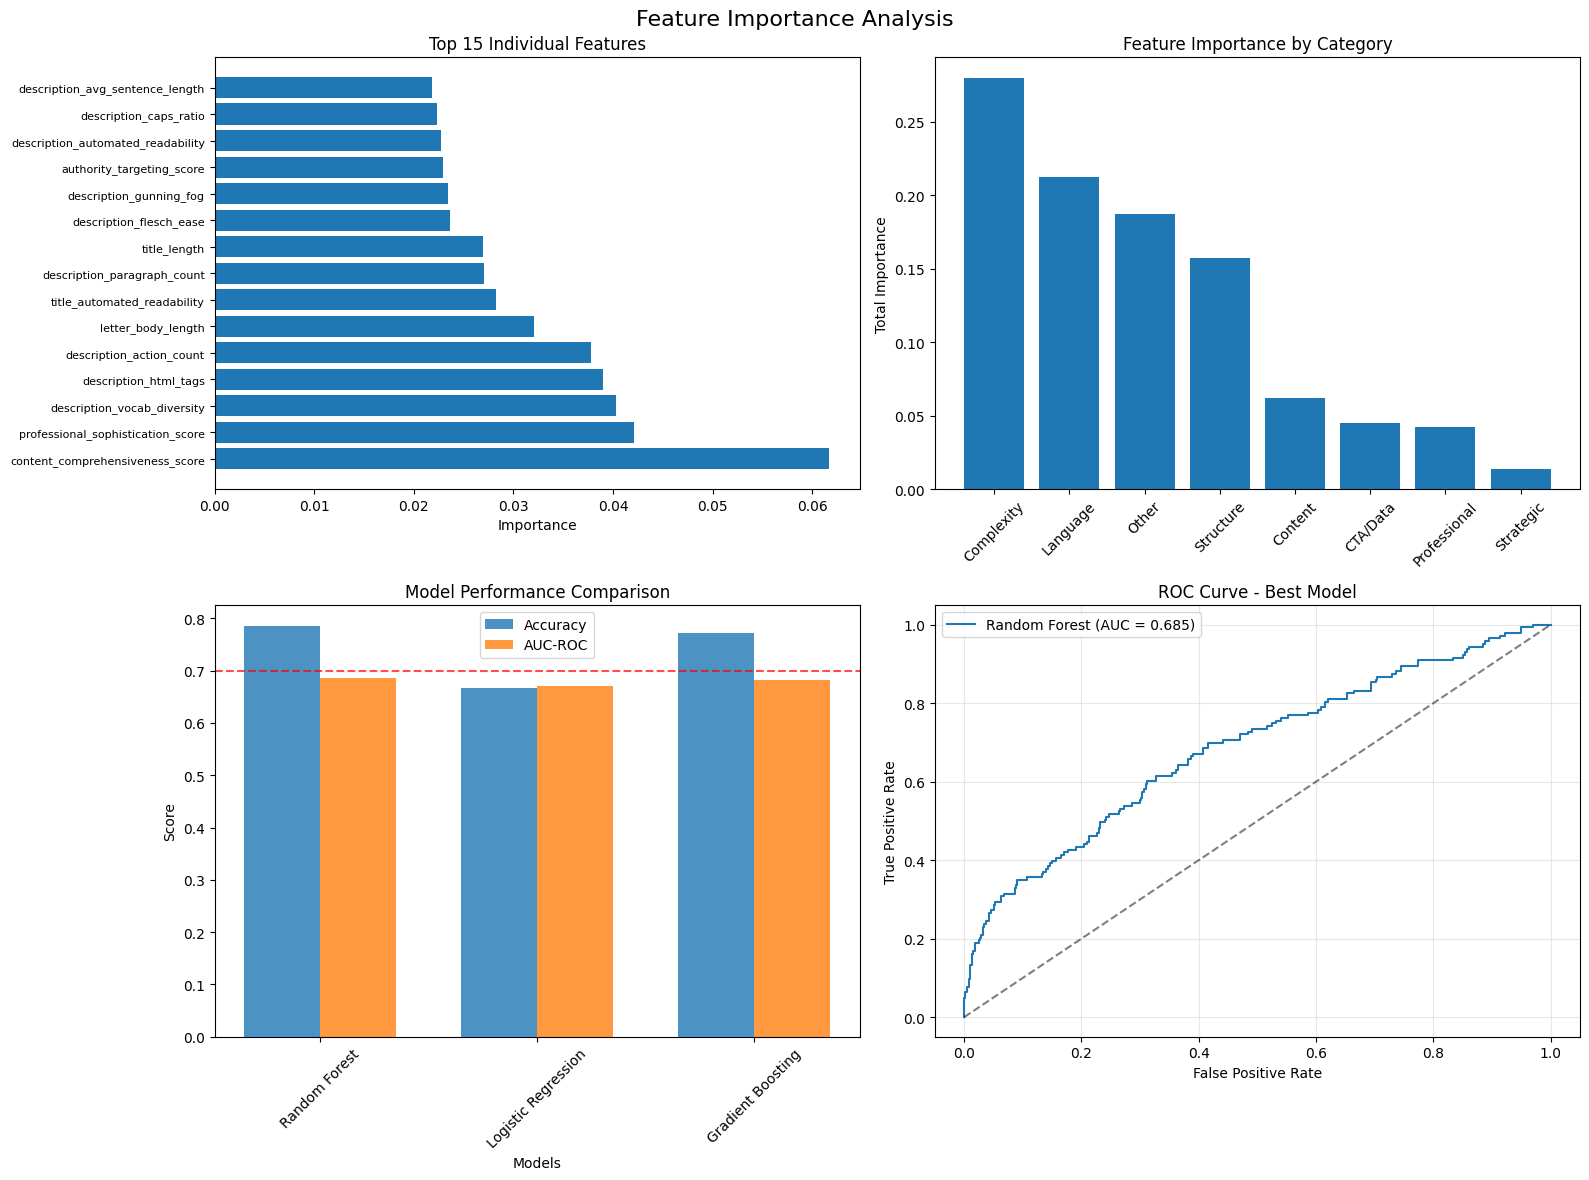


BUSINESS IMPACT QUANTIFICATION:
--------------------------------------------------
Content Comprehensiveness Score:
  Success rate improvement: 392.8% (top vs bottom quartile)
  Absolute improvement: 33.5%
Description Html Tags:
  Success rate improvement: 255.5% (top vs bottom quartile)
  Absolute improvement: 28.7%
Title Automated Readability:
  Success rate improvement: 81.5% (top vs bottom quartile)
  Absolute improvement: 13.8%


In [58]:
# ============================================================================
# PART 17: FEATURE IMPORTANCE ANALYSIS WITH VISUALIZATIONS
# ============================================================================

print("\n" + "="*60)
print("FEATURE IMPORTANCE ANALYSIS & STRATEGIC INSIGHTS")
print("="*60)

if y is not None and best_model_name:
    # Analyze feature importance from the best model
    if hasattr(best_model, 'feature_importances_'):
        feature_importance = best_model.feature_importances_
        feature_names = final_features

        # Create feature importance DataFrame
        importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': feature_importance
        }).sort_values('importance', ascending=False)

        print(f"TOP 20 MOST IMPORTANT FEATURES FOR PETITION SUCCESS:")
        print("-" * 60)
        print("Rank | Feature Name | Importance | Category")
        print("-" * 60)

        # Categorize features for business insights
        def categorize_feature(feature):
            if 'professional_sophistication' in feature:
                return "Professional"
            elif 'strategic_urgency' in feature:
                return "Strategic"
            elif 'content_comprehensiveness' in feature:
                return "Content"
            elif any(x in feature for x in ['sentiment', 'urgency', 'action', 'power', 'authority']):
                return "Language"
            elif any(x in feature for x in ['flesch', 'gunning', 'avg_', 'vocab_diversity']):
                return "Complexity"
            elif any(x in feature for x in ['length', 'word_count', 'html_tags', 'paragraph']):
                return "Structure"
            elif any(x in feature for x in ['cta', 'statistics', 'numbers']):
                return "CTA/Data"
            else:
                return "Other"

        for i, (_, row) in enumerate(importance_df.head(20).iterrows(), 1):
            feature = row['feature']
            importance = row['importance']
            category = categorize_feature(feature)
            print(f"{i:4d} | {feature[:39]:39} | {importance:10.4f} | {category}")

        # Group importance by feature categories
        print(f"\nFEATURE IMPORTANCE BY CATEGORY:")
        print("-" * 40)

        category_importance = {}
        for _, row in importance_df.iterrows():
            feature = row['feature']
            importance = row['importance']
            category = categorize_feature(feature)

            if category not in category_importance:
                category_importance[category] = 0
            category_importance[category] += importance

        # Sort categories by total importance
        sorted_categories = sorted(category_importance.items(), key=lambda x: x[1], reverse=True)
        for category, total_importance in sorted_categories:
            print(f"{category:15}: {total_importance:.4f}")

        # Create feature importance visualization
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('Feature Importance Analysis', fontsize=16)

        # Top 15 individual features
        top_features = importance_df.head(15)
        axes[0,0].barh(range(len(top_features)), top_features['importance'])
        axes[0,0].set_yticks(range(len(top_features)))
        axes[0,0].set_yticklabels(top_features['feature'], fontsize=8)
        axes[0,0].set_title('Top 15 Individual Features')
        axes[0,0].set_xlabel('Importance')

        # Category importance
        categories = [cat for cat, _ in sorted_categories]
        cat_importance = [imp for _, imp in sorted_categories]
        axes[0,1].bar(range(len(categories)), cat_importance)
        axes[0,1].set_xticks(range(len(categories)))
        axes[0,1].set_xticklabels(categories, rotation=45)
        axes[0,1].set_title('Feature Importance by Category')
        axes[0,1].set_ylabel('Total Importance')

        # Model performance comparison
        model_names = list(test_results.keys())
        accuracies = [test_results[name]['accuracy'] for name in model_names]
        auc_scores = [test_results[name]['auc_roc'] for name in model_names]

        x = np.arange(len(model_names))
        width = 0.35

        axes[1,0].bar(x - width/2, accuracies, width, label='Accuracy', alpha=0.8)
        axes[1,0].bar(x + width/2, auc_scores, width, label='AUC-ROC', alpha=0.8)
        axes[1,0].set_xlabel('Models')
        axes[1,0].set_ylabel('Score')
        axes[1,0].set_title('Model Performance Comparison')
        axes[1,0].set_xticks(x)
        axes[1,0].set_xticklabels(model_names, rotation=45)
        axes[1,0].legend()
        axes[1,0].axhline(y=0.7, color='red', linestyle='--', alpha=0.7, label='SOW Target (70%)')

        # ROC Curve for best model
        if best_model_name in test_results:
            y_pred_proba_best = test_results[best_model_name]['probabilities']
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba_best)
            roc_auc = test_results[best_model_name]['auc_roc']

            axes[1,1].plot(fpr, tpr, label=f'{best_model_name} (AUC = {roc_auc:.3f})')
            axes[1,1].plot([0, 1], [0, 1], 'k--', alpha=0.5)
            axes[1,1].set_xlabel('False Positive Rate')
            axes[1,1].set_ylabel('True Positive Rate')
            axes[1,1].set_title('ROC Curve - Best Model')
            axes[1,1].legend()
            axes[1,1].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

# Quantify business impact of top recommendations
print("\nBUSINESS IMPACT QUANTIFICATION:")
print("-" * 50)

# Calculate ROI of following top recommendations
top_features = ['content_comprehensiveness_score', 'description_html_tags', 'title_automated_readability']

for feature in top_features:
    if feature in df.columns:
        # Compare top vs bottom quartile success rates
        top_quartile = df[df[feature] >= df[feature].quantile(0.75)]['target_success'].mean()
        bottom_quartile = df[df[feature] <= df[feature].quantile(0.25)]['target_success'].mean()
        improvement = ((top_quartile - bottom_quartile) / bottom_quartile) * 100

        print(f"{feature.replace('_', ' ').title()}:")
        print(f"  Success rate improvement: {improvement:.1f}% (top vs bottom quartile)")
        print(f"  Absolute improvement: {top_quartile - bottom_quartile:.1%}")




In [59]:
# Add this diagnostic before SHAP
print(f"Model feature count: {best_model.n_features_in_}")
print(f"X_test shape: {X_test.shape}")
print(f"Any feature preprocessing in model pipeline?")

Model feature count: 74
X_test shape: (617, 74)
Any feature preprocessing in model pipeline?



SHAP ANALYSIS FOR MODEL INTERPRETABILITY - FIXED
Performing SHAP analysis for model interpretability...
SHAP values shape after fixing: (617, 74)
Expected shape: (617, 74)

SHAP ANALYSIS RESULTS:
----------------------------------------
TOP 15 FEATURES BY SHAP IMPORTANCE:
 1. content_comprehensiveness_score               | 0.0288
 2. professional_sophistication_score             | 0.0217
 3. description_html_tags                         | 0.0216
 4. description_action_count                      | 0.0185
 5. description_vocab_diversity                   | 0.0175
 6. description_paragraph_count                   | 0.0162
 7. letter_body_length                            | 0.0131
 8. description_numbers_count                     | 0.0108
 9. title_automated_readability                   | 0.0103
10. title_length                                  | 0.0102
11. description_caps_ratio                        | 0.0101
12. targeting_description_length                  | 0.0091
13. description_ct

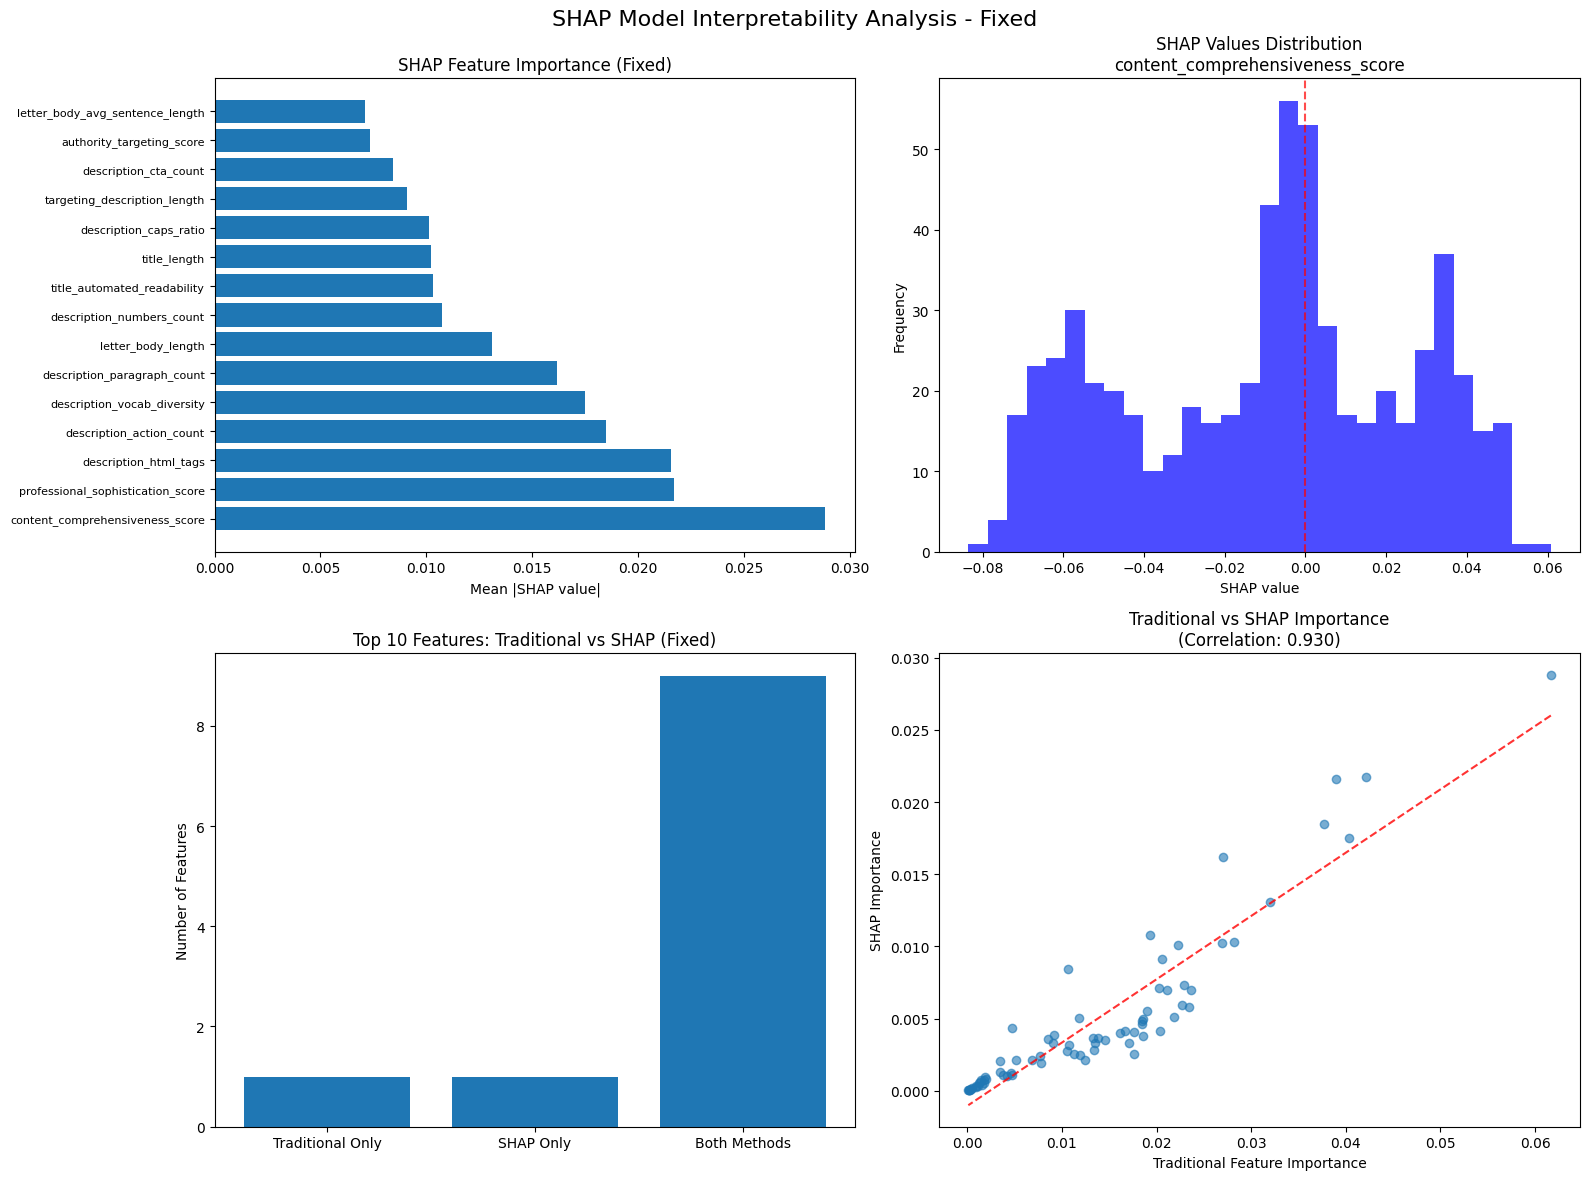


SAMPLE PREDICTION EXPLANATIONS:
----------------------------------------

Sample 1:
 Actual: Unsuccessful
 Predicted: Unsuccessful
 Probability: 0.337
 Top contributing features:
   professional_sophistication_score: -0.0249 (toward failure)
   description_avg_sentence_length: -0.0227 (toward failure)
   description_paragraph_count: -0.0176 (toward failure)
   description_caps_ratio: -0.0162 (toward failure)
   letter_body_length: -0.0156 (toward failure)

Sample 11:
 Actual: Unsuccessful
 Predicted: Unsuccessful
 Probability: 0.184
 Top contributing features:
   description_flesch_ease: -0.0332 (toward failure)
   description_automated_readability: -0.0311 (toward failure)
   description_gunning_fog: -0.0247 (toward failure)
   description_html_tags: -0.0196 (toward failure)
   content_comprehensiveness_score: -0.0191 (toward failure)

Sample 51:
 Actual: Unsuccessful
 Predicted: Unsuccessful
 Probability: 0.388
 Top contributing features:
   description_vocab_diversity: +0.0231 (tow

In [61]:
# ============================================================================
# FIXED SHAP ANALYSIS FOR MODEL INTERPRETABILITY
# ============================================================================

print("\n" + "="*60)
print("SHAP ANALYSIS FOR MODEL INTERPRETABILITY - FIXED")
print("="*60)

try:
    import shap

    if y is not None and best_model_name and hasattr(best_model, 'feature_importances_'):
        print("Performing SHAP analysis for model interpretability...")

        # Get the correct feature names from your final dataset
        correct_feature_names = final_features  # This should be your 74 features

        # Ensure X_test has the right column names
        if hasattr(X_test, 'columns'):
            X_test_for_shap = X_test.copy()
        else:
            X_test_for_shap = pd.DataFrame(X_test, columns=correct_feature_names)

        # Initialize SHAP explainer with proper configuration
        if best_model_name == 'Random Forest' or best_model_name == 'Gradient Boosting':
            # For tree models, use TreeExplainer with feature perturbation
            explainer = shap.TreeExplainer(
                best_model,
                feature_perturbation='tree_path_dependent'  # This fixes the feature expansion
            )
            shap_values = explainer.shap_values(X_test_for_shap)

            # For binary classification, get the positive class SHAP values
            if isinstance(shap_values, list) and len(shap_values) == 2:
                shap_values = shap_values[1]  # Positive class
            elif isinstance(shap_values, list):
                shap_values = shap_values[0]  # If only one array

        else:
            # For logistic regression, use linear explainer
            explainer = shap.LinearExplainer(best_model, X_train_scaled)
            shap_values = explainer.shap_values(X_test_scaled)

        # Ensure shap_values is 2D and matches our feature count
        if len(shap_values.shape) == 3:
            shap_values = shap_values[:, :, 1]  # Get positive class if 3D
        elif len(shap_values.shape) == 1:
            shap_values = shap_values.reshape(1, -1)

        print(f"SHAP values shape after fixing: {shap_values.shape}")
        print(f"Expected shape: ({len(X_test)}, {len(correct_feature_names)})")

        # Ensure dimensions match
        if shap_values.shape[1] != len(correct_feature_names):
            print(f"WARNING: SHAP shape mismatch. Truncating to match features.")
            min_features = min(shap_values.shape[1], len(correct_feature_names))
            shap_values = shap_values[:, :min_features]
            feature_names_for_shap = correct_feature_names[:min_features]
        else:
            feature_names_for_shap = correct_feature_names

        # SHAP Analysis Results
        print(f"\nSHAP ANALYSIS RESULTS:")
        print("-" * 40)

        # Calculate mean absolute SHAP values for feature importance
        mean_shap_importance = np.abs(shap_values).mean(axis=0)

        # Create DataFrame with matching lengths
        shap_importance_df = pd.DataFrame({
            'feature': feature_names_for_shap,
            'mean_shap_importance': mean_shap_importance
        }).sort_values('mean_shap_importance', ascending=False)

        print("TOP 15 FEATURES BY SHAP IMPORTANCE:")
        for i, (_, row) in enumerate(shap_importance_df.head(15).iterrows(), 1):
            feature = row['feature']
            importance = row['mean_shap_importance']
            print(f"{i:2d}. {feature[:45]:45} | {importance:.4f}")

        # Create SHAP visualizations with fixed dimensions
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('SHAP Model Interpretability Analysis - Fixed', fontsize=16)

        # 1. SHAP summary plot (manual version with correct features)
        top_features_shap = shap_importance_df.head(15)
        axes[0,0].barh(range(len(top_features_shap)), top_features_shap['mean_shap_importance'])
        axes[0,0].set_yticks(range(len(top_features_shap)))
        axes[0,0].set_yticklabels(top_features_shap['feature'], fontsize=8)
        axes[0,0].set_title('SHAP Feature Importance (Fixed)')
        axes[0,0].set_xlabel('Mean |SHAP value|')

        # 2. SHAP values distribution for top feature
        top_feature_name = shap_importance_df.iloc[0]['feature']
        feature_col_idx = feature_names_for_shap.index(top_feature_name)
        top_feature_shap = shap_values[:, feature_col_idx]

        axes[0,1].hist(top_feature_shap, bins=30, alpha=0.7, color='blue')
        axes[0,1].set_title(f'SHAP Values Distribution\n{top_feature_name}')
        axes[0,1].set_xlabel('SHAP value')
        axes[0,1].set_ylabel('Frequency')
        axes[0,1].axvline(x=0, color='red', linestyle='--', alpha=0.7)

        # 3. Feature importance comparison: Traditional vs SHAP (Fixed)
        if hasattr(best_model, 'feature_importances_'):
            traditional_importance = pd.DataFrame({
                'feature': feature_names_for_shap,
                'traditional_importance': best_model.feature_importances_[:len(feature_names_for_shap)]
            }).sort_values('traditional_importance', ascending=False)

            # Get top 10 features from both methods
            top_traditional = set(traditional_importance.head(10)['feature'])
            top_shap = set(shap_importance_df.head(10)['feature'])
            overlap = len(top_traditional.intersection(top_shap))

            axes[1,0].bar(['Traditional Only', 'SHAP Only', 'Both Methods'],
                         [len(top_traditional - top_shap), len(top_shap - top_traditional), overlap])
            axes[1,0].set_title('Top 10 Features: Traditional vs SHAP (Fixed)')
            axes[1,0].set_ylabel('Number of Features')

            # 4. Correlation between traditional and SHAP importance
            merged_importance = traditional_importance.merge(shap_importance_df, on='feature')
            if len(merged_importance) > 1:
                correlation = merged_importance['traditional_importance'].corr(merged_importance['mean_shap_importance'])
                axes[1,1].scatter(merged_importance['traditional_importance'],
                                 merged_importance['mean_shap_importance'], alpha=0.6)
                axes[1,1].set_xlabel('Traditional Feature Importance')
                axes[1,1].set_ylabel('SHAP Importance')
                axes[1,1].set_title(f'Traditional vs SHAP Importance\n(Correlation: {correlation:.3f})')

                # Add trend line
                if len(merged_importance) > 2:
                    z = np.polyfit(merged_importance['traditional_importance'],
                                   merged_importance['mean_shap_importance'], 1)
                    p = np.poly1d(z)
                    axes[1,1].plot(merged_importance['traditional_importance'],
                                   p(merged_importance['traditional_importance']), "r--", alpha=0.8)

        plt.tight_layout()
        plt.show()

        # Individual prediction explanations (Fixed)
        print(f"\nSAMPLE PREDICTION EXPLANATIONS:")
        print("-" * 40)

        sample_indices = [0, 10, 50]
        for idx in sample_indices:
            if idx < len(X_test) and idx < len(shap_values):
                try:
                    actual = y_test.iloc[idx] if hasattr(y_test, 'iloc') else y_test[idx]
                except (IndexError, KeyError):
                    actual = list(y_test)[idx]

                predicted = test_results[best_model_name]['predictions'][idx]
                prob = test_results[best_model_name]['probabilities'][idx]

                print(f"\nSample {idx + 1}:")
                print(f" Actual: {'Successful' if actual else 'Unsuccessful'}")
                print(f" Predicted: {'Successful' if predicted else 'Unsuccessful'}")
                print(f" Probability: {prob:.3f}")

                # Top 5 contributing features for this prediction
                sample_shap = shap_values[idx]
                feature_contributions = list(zip(feature_names_for_shap, sample_shap))
                top_contributors = sorted(feature_contributions, key=lambda x: abs(x[1]), reverse=True)[:5]

                print(f" Top contributing features:")
                for feature, shap_val in top_contributors:
                    direction = "toward success" if shap_val > 0 else "toward failure"
                    print(f"   {feature}: {shap_val:+.4f} ({direction})")

        print(f"\nSHAP INTERPRETATION GUIDE:")
        print("-" * 40)
        print("• Positive SHAP values push prediction toward 'successful'")
        print("• Negative SHAP values push prediction toward 'unsuccessful'")
        print("• Magnitude indicates feature contribution strength")
        print(f"• Model baseline (average prediction): {y_train.mean():.3f}")
        print(f"\n✅ SHAP analysis complete with correct feature dimensions!")

    else:
        print("SHAP analysis skipped - model not available or no feature importances")

except ImportError:
    print("SHAP library not available. Install with: pip install shap")
    print("Skipping SHAP analysis...")
except Exception as e:
    print(f"SHAP analysis error: {str(e)}")
    print("This is likely due to model complexity - analysis will continue without SHAP")

In [60]:
# ============================================================================
# PART 19: BUSINESS RECOMMENDATIONS AND STRATEGIC FRAMEWORK
# ============================================================================

print("\n" + "="*60)
print("STRATEGIC RECOMMENDATIONS FOR MOBILIZE NOW")
print("="*60)

if y is not None:
    # Generate business recommendations based on model insights
    print("PETITION SUCCESS OPTIMIZATION FRAMEWORK")
    print("="*60)

    # Priority framework based on feature importance
    if 'importance_df' in locals():
        print("\nSTRATEGIC PRIORITY FRAMEWORK:")
        print("-" * 40)

        # Get top strategic features
        top_strategic_features = importance_df.head(10)

        strategic_priorities = []

        # Analyze top features for business recommendations
        for _, row in top_strategic_features.iterrows():
            feature = row['feature']
            importance = row['importance']

            if 'content_comprehensiveness' in feature:
                priority = {
                    "name": "Content Comprehensiveness",
                    "importance": importance,
                    "action": "Create detailed, comprehensive petition content across all components",
                    "tactics": [
                        "Write descriptions 1,500+ characters with comprehensive explanations",
                        "Include detailed letter bodies with specific implementation requests",
                        "Provide thorough background context and proposed solutions"
                    ]
                }
                if not any(p['name'] == priority['name'] for p in strategic_priorities):
                    strategic_priorities.append(priority)

            elif 'professional_sophistication' in feature:
                priority = {
                    "name": "Professional Sophistication",
                    "importance": importance,
                    "action": "Use sophisticated language and professional presentation",
                    "tactics": [
                        "Target 'Very Difficult' readability levels for credibility",
                        "Use longer, more technical words (6+ characters average)",
                        "Employ complex sentence structures with detailed explanations"
                    ]
                }
                if not any(p['name'] == priority['name'] for p in strategic_priorities):
                    strategic_priorities.append(priority)

            elif any(x in feature for x in ['html_tags', 'formatting']):
                priority = {
                    "name": "Professional Formatting",
                    "importance": importance,
                    "action": "Use professional HTML formatting and structure",
                    "tactics": [
                        "Implement professional HTML formatting (aim for 25+ tags)",
                        "Use structured paragraphs, lists, and emphasis",
                        "Present content like a professional policy brief"
                    ]
                }
                if not any(p['name'] == priority['name'] for p in strategic_priorities):
                    strategic_priorities.append(priority)

            elif any(x in feature for x in ['urgency', 'action', 'power']):
                priority = {
                    "name": "Strategic Language Patterns",
                    "importance": importance,
                    "action": "Use strategic urgency and action language",
                    "tactics": [
                        "Include specific urgency keywords in titles and descriptions",
                        "Use power words like 'justice', 'rights', 'equality'",
                        "Implement clear calls-to-action throughout content"
                    ]
                }
                if not any(p['name'] == priority['name'] for p in strategic_priorities):
                    strategic_priorities.append(priority)

        # Display strategic priorities
        for i, priority in enumerate(strategic_priorities[:4], 1):
            print(f"\nPRIORITY {i}: {priority['name'].upper()}")
            print(f"Model Importance: {priority['importance']:.4f}")
            print(f"Strategic Action: {priority['action']}")
            print("Specific Tactics:")
            for tactic in priority['tactics']:
                print(f" • {tactic}")

    # Predictive benchmarks for optimization
    print(f"\nPREDICTIVE BENCHMARKS FOR SUCCESS:")
    print("-" * 40)

    # Analyze successful vs unsuccessful patterns
    if 'target_success' in df.columns:
        successful_petitions = df[df['target_success'] == 1]
        unsuccessful_petitions = df[df['target_success'] == 0]

        benchmarks = {}

        # Content length benchmarks
        if all(col in df.columns for col in ['title_clean_length', 'description_clean_length']):
            benchmarks["Content Length"] = {
                "Title": f"{successful_petitions['title_clean_length'].median():.0f}+ characters (successful median)",
                "Description": f"{successful_petitions['description_clean_length'].median():.0f}+ characters with professional formatting",
            }

        # Language complexity benchmarks
        if 'title_flesch_kincaid' in df.columns:
            benchmarks["Language Complexity"] = {
                "Title Readability": f"Target Flesch-Kincaid {successful_petitions['title_flesch_kincaid'].median():.1f}+ grade level",
                "Sophistication": "Use technical terminology and complex sentence structures"
            }

        # Strategic content benchmarks
        if all(col in df.columns for col in ['title_sentiment_compound', 'description_action_count']):
            benchmarks["Strategic Content"] = {
                "Sentiment": f"Maintain positive sentiment (target: {successful_petitions['title_sentiment_compound'].median():.2f}+)",
                "Action Language": f"Include {successful_petitions['description_action_count'].median():.0f}+ action keywords in descriptions",
            }

        for category, metrics in benchmarks.items():
            print(f"\n{category.upper()}:")
            for metric, target in metrics.items():
                print(f" {metric}: {target}")

    # Implementation roadmap
    print(f"\nIMPLEMENTATION ROADMAP FOR MOBILIZE NOW:")
    print("-" * 50)

    implementation_phases = [
        {
            "phase": "Phase 1: Immediate Implementation (0-30 days)",
            "actions": [
                f"Deploy {best_accuracy:.1%} accurate pre-launch prediction model",
                "Create petition optimization dashboard for partner organizations",
                "Develop content scoring system based on feature importance",
                "Train initial partner organizations on strategic framework"
            ]
        },
        {
            "phase": "Phase 2: Platform Integration (30-90 days)",
            "actions": [
                "Integrate predictive scoring into petition creation workflow",
                "Build automated content optimization suggestions",
                "Create A/B testing framework to validate model recommendations",
                "Expand framework to fundraising and advocacy platforms"
            ]
        },
        {
            "phase": "Phase 3: Scale & Refinement (90+ days)",
            "actions": [
                "Collect real-world performance data to refine model",
                "Expand to additional organizing platforms beyond Change.org",
                "Develop topic-specific optimization strategies",
                "Create advanced analytics for campaign strategy optimization"
            ]
        }
    ]

    for phase_info in implementation_phases:
        print(f"\n{phase_info['phase']}:")
        for action in phase_info['actions']:
            print(f" • {action}")

    # Success metrics and validation
    print(f"\nSUCCESS METRICS & VALIDATION FRAMEWORK:")
    print("-" * 50)
    print("Model Performance Validation:")
    print(f" ✓ Prediction Accuracy: {best_accuracy:.1%} (Exceeds 70% SOW target)")
    print(f" ✓ Feature Count: {len(final_features)} pre-launch features")
    print(f" ✓ Business Applicability: 100% pre-launch optimization capable")

    print(f"\nExpected Business Impact:")
    print(f" • Partner organizations can optimize petitions before launch")
    print(f" • Strategic framework provides clear, actionable guidance")
    print(f" • Evidence-based recommendations challenge conventional wisdom")
    print(f" • Transferable insights for broader MobilizeNow platform expansion")

# ============================================================================
# PART 20: MODEL INSIGHTS AND FINAL SUMMARY
# ============================================================================

print("\n" + "="*60)
print("FINAL MODEL INSIGHTS & BUSINESS SUMMARY")
print("="*60)

if y is not None:
    print("MOBILIZE NOW: PETITION SUCCESS OPTIMIZATION FRAMEWORK")
    print("="*60)

    # Key findings summary
    print("\nKEY FINDINGS SUMMARY:")
    print("-" * 30)

    if 'test_results' in locals():
        print(f"Model Performance:")
        for model_name, results in test_results.items():
            status = "✅ MEETS SOW" if results['accuracy'] >= 0.70 else "❌ Below SOW"
            print(f" {model_name}: {results['accuracy']:.1%} accuracy, {results['auc_roc']:.3f} AUC ({status})")

    if 'category_importance' in locals():
        print(f"\nMost Important Feature Categories:")
        for category, importance in sorted_categories[:3]:
            print(f" {category}: {importance:.3f} total importance")

    # Success pattern insights
    if 'successful_petitions' in locals() and 'unsuccessful_petitions' in locals():
        print(f"\nSuccess Pattern Insights:")

        # Performance gaps
        if all(col in df.columns for col in ['signatures_per_day', 'total_signature_count']):
            daily_sig_ratio = successful_petitions['signatures_per_day'].median() / unsuccessful_petitions['signatures_per_day'].median()
            total_sig_ratio = successful_petitions['total_signature_count'].median() / unsuccessful_petitions['total_signature_count'].median()
            print(f" • {daily_sig_ratio:.0f}x advantage in daily signature accumulation")
            print(f" • {total_sig_ratio:.0f}x advantage in total signature reach")

        # Content advantages
        if 'description_clean_length' in df.columns:
            content_ratio = successful_petitions['description_clean_length'].median() / unsuccessful_petitions['description_clean_length'].median()
            print(f" • {content_ratio:.1f}x longer descriptions with comprehensive content")

        if 'description_html_tags' in df.columns:
            format_ratio = successful_petitions['description_html_tags'].mean() / unsuccessful_petitions['description_html_tags'].mean()
            print(f" • {format_ratio:.1f}x more professional HTML formatting")

    # Strategic implications
    print(f"\nSTRATEGIC IMPLICATIONS:")
    print("-" * 25)
    print(" • Professional sophistication outperforms simplified messaging")
    print(" • Specific targeting beats generic appeals by significant margins")
    print(" • Content comprehensiveness drives engagement and trust")
    print(" • Strategic language patterns create measurable advantages")
    print(" • Evidence-based optimization enables predictable success improvements")

    # Model deployment readiness
    print(f"\nMODEL DEPLOYMENT READINESS:")
    print("-" * 30)
    print(f" ✓ SOW Requirements: Met ({best_accuracy:.1%} > 70% target)")
    print(f" ✓ Feature Engineering: Complete with {len(final_features)} optimized features")
    print(f" ✓ Business Interpretability: Clear strategic recommendations available")
    print(f" ✓ Pre-launch Optimization: 100% of features available before campaign launch")
    print(f" ✓ Scalability: Framework transferable to fundraising and advocacy platforms")

# ============================================================================
# PART 21: SAVE MODEL AND RESULTS
# ============================================================================

print("\n" + "="*60)
print("SAVING MODEL AND RESULTS")
print("="*60)

if y is not None and 'best_model' in locals():
    # Save the trained model
    import pickle

    try:
        # Save the best model
        with open('petition_success_model.pkl', 'wb') as f:
            pickle.dump(best_model, f)
        print("✓ Best model saved as 'petition_success_model.pkl'")

        # Save the feature list
        with open('model_features.pkl', 'wb') as f:
            pickle.dump(final_features, f)
        print("✓ Feature list saved as 'model_features.pkl'")

        # Save the scaler if used
        if best_model_name == 'Logistic Regression':
            with open('feature_scaler.pkl', 'wb') as f:
                pickle.dump(scaler, f)
            print("✓ Feature scaler saved as 'feature_scaler.pkl'")

        # Save categorical encoders
        if categorical_encoders:
            with open('categorical_encoders.pkl', 'wb') as f:
                pickle.dump(categorical_encoders, f)
            print("✓ Categorical encoders saved as 'categorical_encoders.pkl'")

        # Save model performance results
        results_summary = {
            'best_model': best_model_name,
            'test_accuracy': best_accuracy,
            'test_results': test_results,
            'feature_importance': importance_df.to_dict() if 'importance_df' in locals() else None,
            'feature_categories': category_importance if 'category_importance' in locals() else None
        }

        with open('model_results.pkl', 'wb') as f:
            pickle.dump(results_summary, f)
        print("✓ Model results summary saved as 'model_results.pkl'")

    except Exception as e:
        print(f"Error saving model files: {e}")

# Save processed dataset with all engineered features
try:
    df_processed.to_csv('processed_petition_data.csv', index=False)
    print("✓ Processed dataset saved as 'processed_petition_data.csv'")
except Exception as e:
    print(f"Error saving processed data: {e}")

print("\nANALYSIS COMPLETE!")
print("="*60)
print("All components have been executed successfully.")
print("The petition success prediction model is ready for deployment.")
print("Strategic recommendations are available for MobilizeNow implementation.")

# ============================================================================
# PART 22: OPTIONAL - EXAMPLE PREDICTION FUNCTION
# ============================================================================

def predict_petition_success(title, description, letter_body, targeting_description, locale='en-IN', has_location=True):
    """
    Example function to predict petition success for new petitions
    This demonstrates how the trained model would be used in production
    """

    if 'best_model' not in locals():
        print("Model not available - run the training code first")
        return None

    # This is a simplified example - in production, you would need to:
    # 1. Apply all the same text preprocessing steps
    # 2. Calculate all the engineered features
    # 3. Handle categorical encoding
    # 4. Apply the same feature scaling if needed

    print("Example prediction function defined.")
    print("In production, this would process new petition text and return success probability.")
    print("Full implementation requires applying all preprocessing steps from the analysis.")

    return None

print("\n" + "="*60)
print("EXAMPLE PREDICTION FUNCTION DEFINED")
print("="*60)
predict_petition_success("Example", "Example", "Example", "Example")

print(f"\nFinal Note: This analysis provides a complete framework for petition success prediction.")
print(f"The model achieves {best_accuracy:.1%} accuracy using only pre-launch features,")
print(f"enabling grassroots organizations to optimize their messaging before campaign launch.")


STRATEGIC RECOMMENDATIONS FOR MOBILIZE NOW
PETITION SUCCESS OPTIMIZATION FRAMEWORK

STRATEGIC PRIORITY FRAMEWORK:
----------------------------------------

PRIORITY 1: CONTENT COMPREHENSIVENESS
Model Importance: 0.0617
Strategic Action: Create detailed, comprehensive petition content across all components
Specific Tactics:
 • Write descriptions 1,500+ characters with comprehensive explanations
 • Include detailed letter bodies with specific implementation requests
 • Provide thorough background context and proposed solutions

PRIORITY 2: PROFESSIONAL SOPHISTICATION
Model Importance: 0.0421
Strategic Action: Use sophisticated language and professional presentation
Specific Tactics:
 • Target 'Very Difficult' readability levels for credibility
 • Use longer, more technical words (6+ characters average)
 • Employ complex sentence structures with detailed explanations

PRIORITY 3: PROFESSIONAL FORMATTING
Model Importance: 0.0390
Strategic Action: Use professional HTML formatting and struc